# Non linear, differentiable optimization
<br>
<div class="alert alert-warning">**Preamble:**<br>
This notebook is long. Probably too long for a 3 or 4h class for most students. So the intention is not to finish it in that period of time. Instead, it is divided into 7 sections: section 1 summarizes what you *must* know, which is developped in parts 2, 3 and 4. Parts 5, 6 and 7 contain supplementary material that is necessary for optimization engineers and scientists but that can be skipped for the purpose of this introductory class.
</div>
<br>
<div class="alert alert-info">**Target skills:**<br>
After this class you should be able to:
<ul><li> transform an optimization problem from its 'plain words' formulation to its mathematical formulation (part 2)
<li> explain what a gradient is (part 3)
<li> explain what convexity is (part 3)
<li> explain what a Hessian matrix is (part 3)
<li> explain what gradient descent is (part 3)
<li> implement a gradient descent algorithm (part 3)
<li> explain why the step size in gradient descent needs to be adapted (part 3)
<li> know the scipy.optimize.minimize function (part 3)
<li> formulate a contrained non-linear optimization problem and distinguish it from other problems (parts 2 and 4)
<li> know the scipy.optimize.fmin_slsqp function (part 4)
</ul>
</div>

If you go through the supplementary material, you should be able to:
- explain what a Hessian is (part 5)
- explain what function conditioning is (part 5)
- know the conjugate gradients, Newton conjugate gradient and BFGS methods (part 5)
- know the Karush-Kuhn-Tucker theory of constrained optimization (part 6)
- know how (sequential) quadratic programming works (part 7)

**Table of contents**
1. [What you must know (class summary)](#part1)
2. [Modeling optimization problems](#part2)
3. [Gradient Descent](#part3)
    1. [Descent algorithms](#part3.1)
    2. [Gradient descent with fixed step size](#part3.2)
    3. [A first attempt at adaptive step sizes](#part3.3)
    4. [Line search](#part3.4)
    5. [Convexity](#part3.5)
    6. [Adapting the descent directions to the function's conditioning](#part3.6)
4. [Constrained optimization](#part4)
5. [[Optional] Convexity and higher-order methods](#part5)
6. [[Optional] Introduction to the Karush-Kuhn-Tucker theory](#part6)
    1. [A graphical introduction](#part6.1)
    2. [The Lagrangian and Karush-Kuhn-Tucker's conditions](#part6.2)
    3. [Analytical resolution of nonlinear programming problems using the KKT conditions](#part6.3)
7. [[Optional] (Sequential) Quadratic programming](#part7)

# 1. <a id="part1"></a>What you must know

This is a brief summary of the class' main results.
<div class="alert alert-success">
<ul>
<li> Job of the optimization scientist : 
<ol><li> transform plain words formulations into mathematical descriptions
<li> identify to what category of optimization problem they belong
<li> design the most appropriate resolution method or choose the best off-the-shelf numerical tool to solve it
<li> put it back into words and comment it
</ol>
<li> Differentiable optimization: optimization problems with continuous variables and differentiable objective function and constraints.
<li> Gradient of a function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ in $\hat{x}\in\mathbb{R}^n$. $$\nabla_x f(\hat{x})= \frac{\partial f}{\partial x}(\hat{x}) = \left(\begin{array}{c} \frac{\partial f}{\partial x_1}(\hat{x})\\ \vdots\\  \frac{\partial f}{\partial x_n}(\hat{x}) \end{array}\right)$$
<li> [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) provides a whole set of off-the-shelf optimization algorithms (plus some utility functions).
<li> Descent algorithms define a sequence $x_{k+1} = x_k + \alpha_k d_k$.
<li> Gradient descent algorithms take descent steps in the opposite direction of the gradient: $d_k = -\frac{\nabla_x f(x_k)}{\|\nabla_x f(x_k)\|}$
<li> Fixed step gradient descent finds a neighborhood of a local minimum but does not converges. It oscillates around the minimum.
<li> Line search consists in defining the univariate function $g(\alpha)=f(x_k+\alpha\cdot d_k)$ and minimizing this function to find the step size.
<li> When line search is used in gradient descent, two successive descent directions are always orthogonal $d_k^Td_{k-1} = 0$.
<li> A convex function is defined by the property $\forall (y,z)\in\mathbb{R}^n, \lambda \in [0,1], f(\lambda y + (1-\lambda) z) \leq \lambda f(y) + (1-\lambda) f(z)$.
<li> If $f$ is twice differentiable, its Hessian matrix in $x$ is:
$$H_f(x) = \nabla_x^2 f(x) = \left[ \begin{array}{ccc}
\frac{\partial^2 f}{\partial x_0^2} & \cdots & \frac{\partial^2 f}{\partial x_0 \partial x_n}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_0 \partial x_n} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{array}\right]$$
<li> $H_f(x)\textrm{ is a positive definite matrix} \Leftrightarrow f\textrm{ in convex in }x$
<li> A function's conditioning in $x$ is the ratio $\frac{M(x)}{m(x)}$ where $M(x)$ and $m(x)$ are respectively the largest and the smallest eigen-values of $H_f(x)$.
<li> The idea of the Conjugate Gradients method is to take successive descent directions that, instead of being orthogonal to each other in the standard coordinate system ($d_k^Td_{k-1} = 0$) are orthogonal to each other in the basis spanned by the columns of the Hessian $H$ in $x$, that is $d_k^T [H_f(x_k)] d_{k-1} = 0$. These descent directions are called $H$-conjugate (hence the name of the method) and can be computed iteratively without ever computing the Hessian, using the Polak-Ribiere formula:
$$d_{k} = -g_k + \frac{\left(g_k\right)^T \left(g_k - g_{k-1} \right)}{(g_{k-1})^Tg_{k-1}} d_{k-1}$$
The step size in the conjugate gradients method is found by line search.
<li> Conjugate gradients is available in [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) under the [`fmin_cg`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html) function.
<li> To solve general constrained optimization problems, one can use the [`fmin_slsqp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_slsqp.html) from `scipy.optimize`.
</ul>
</div>

# 2. <a id="part2"></a>Modeling optimization problems

Consider the two following situations.

> An aircraft design engineer comes to you and asks: "In the design department, we usually draw plans of the plane's wings and then try out different I-beam shape factors to test if they can resist the buckling loads suffered in-flight. But we're never really sure that we have the lightest possible beam and that is a problem since the lighter our beams are, the better our plane's propulsion performance. We've heard you mathematicians can help us find the best I-beam shapes."

<img width=300px src="img/raidisseur.png"></img>

> The geography department has lost its maps in a terrible fire. All that is left are some tables with the inter-city distances. Can you draw a map from this data that best fits those distances and find back the cities coordinates?

<img width=200 src="img/gps.png"></img>

Both of these problems are **optimization** problems. They correspond to situations where one wishes to find the **best** configuration among many possible solutions. The job of the optimization scientist or engineer is to transform such plain words formulations into mathematical descriptions, then identify to what category of optimization problem they belong, in order to design the most appropriate resolution method, or choose the best off-the-shelf numerical tool to solve it, and then put it back into words and comment it so that the solution is usable.

In this class, we focus on a particular class of optimization problems which can be cast using only **continuous variables** and for which we can write the optimization criterion as a **differentiable function**.

The optimization criterion is called the **objective function** and the variables that describe our different options are called **decision variables**.

Suppose we write $x$ the vector of problem variables and $f$ the objective function. The differentiable optimization problem is to find the value(s) of $x$ that minimize $f$: 
$$\min_{x\in \mathbb{R}^n} f(x)$$

<div class="alert alert-warning">**Exercice:**<br>
Write the set of variables for each of the two introductory problems. Write the objective function.
</div>
<br>
<div class="alert alert-danger">**Answer:**<br>
1. Aircraft design:<br>
We want to find the best beam shape and $L$ is fixed because it depends on the wing's geometry, so (based on the drawing provided by the design department) our variables are $x=(e,h,b)$.<br>
What the design department wants, is to find the lightest possible beam. So they want to minimize the beam mass. Apparently, they didn't talk about changing the steel alloy they're using (only the beam shape), so we will assume a constant density $\rho$. Therefore, the problem turns out to be the minimization problem:
$$f(x) = \rho L \left( 2eb+eh \right)$$
Note that $\rho$ and $L$ are fixed (provided by the engineering department).<br>
<br>
2. Maps reconstruction:<br>
Drawing a map consists in finding the cities' coordinates. Let's call $(x_c,y_c)$ the coordinates of city $c$ and let's call $[1,C]$ the integer interval of city indices. The vector of decision variables is then $x = (x_0,y_0, \ldots, x_C,y_C)$.<br>
We want to draw a map that respects the inter-city distances. We shall write $d_{ij}$ the distance between cities $i$ and $j$ ($(i,j)\in [1,C]^2$).<br>
So for each pair $(i,j)$, we want the two points $(x_i,y_i)$ and $(x_j,y_j)$ to be $d_{ij}$ apart.<br>
The distance between these two points is $d(i,j) = \sqrt{\left(x_i-x_j\right)^2 + \left(y_i-y_j\right)^2}$. So we want the difference $d(i,j) - d_{ij}$ to be as close to zero as possible. We can get rid of this ugly square root and write that it is equivalent to making the difference $d(i,j)^2 - d_{ij}^2$ as close to zero as possible. Consequently, we want to minimize the  quantity $\left(d(i,j)^2 - d_{ij}^2\right)^2$ and we want to minimize it for all pairs of cities. So our objective function is:
$$f(x) = \sum\limits_{i=1}^C \sum\limits_{j=1}^C \left(\left(x_i-x_j\right)^2 + \left(y_i-y_j\right)^2 - d_{ij}^2\right)^2$$
It is interesting to note that in the sum above, the same term appears twice: for the pairs $(i,j)$ and $(j,i)$. We can simplify our objective function by writing:
$$f(x) = \sum\limits_{i=1}^C \sum\limits_{j=i+1}^C \left(\left(x_i-x_j\right)^2 + \left(y_i-y_j\right)^2 - d_{ij}^2\right)^2$$
</div>

Often, when writing the decision variables and the objective function, we realize they are not sufficient to model our problem. For instance, in the aircraft design problem, we have an obvious, easy to manufacture, beam that minimizes $\left( 2eb+eh \right)$: if we take $e=0$ - that is zero thickness - then the volume is minimized, but it is not certain that was an acceptable beam for the design department. Was is missing is some restriction on the set of beams we look for.

In this particular example, the reason this zero-thickness beam is not acceptable is that it won't resist the in-flight buckling loads. When we ask the design department how we can express such resistance requirements, they answer that the load that can be handled by the beam can be written $\frac{\pi^2 E I}{L^2}$ where $I$ is the beam's moment of inertia $I = e\frac{h^2}{2}\left(\frac{h}{6}+b\right)$. Additionnaly, their previous calculations provide a value $P_{max}$ for the worst-case load suffered in flight. Consequently, we need our beam to respect:
$$P_{max}\leq \frac{\pi^2 E}{L^2} e\frac{h^2}{2}\left(\frac{h}{6}+b\right)$$

Such a relation is what we call a **constraint**. A constraint is an equality or an inequality involving the decision variables, that reduces the set of acceptable solutions for our optimization problem. Suppose the design department also tell us they cannot manufacture beams with a thickness smaller than $e_{min}$ and they need to have a beam's tail $b$ that is always equal to $10e$. Then globally, our design problem can be modeled as:
$$\left\{\begin{array}{c}
\min\limits_{(e,h,b) \in \mathbb{R}^3} \rho L \left( 2eb+eh \right)\\
P_{max}\leq \frac{\pi^2 E}{L^2} e\frac{h^2}{2}\left(\frac{h}{6}+b\right)\\
e\geq e_{min}\\
b = 10e
\end{array}\right.$$

The general case of optimization problems we consider will be written:
\begin{gather}
\min_x f(x)\\
h(x) \leq 0\\
g(x) = 0
\end{gather}

In the example above, we have:

$$h(e,h,b) = \left( \begin{array}{l} P_{max} - \frac{\pi^2 E}{L^2} e\frac{h^2}{2}\left(\frac{h}{6}+b\right)\\ e_{min}-e
\end{array}\right)$$
And :
$$g(e,h,b) = b-10e$$

This class on **differentiable optimization** will focus on problems cast using only **continuous variables** and for which we the objective function and constraints are all **differentiable functions**.

We can them **non-linear** because we do not make any assumptions (besides differentiability) on $f$, $g$ or $h$. By contrast, one of the next classes on linear optimization will focus on the specific case of linear functions.<br>
<br>
<div class="alert alert-warning">**Exercice:**<br>
Does the map reconstruction problem have constraints?
</div>
<br>
<div class="alert alert-danger">**Answer:**<br>
No.<br>
Although it is interesting to remark that the optimal solution is not unique. Suppose you know an optimal assignment for $x = (x_0,y_0, \ldots, x_C,y_C)$; now translate and/or rotate these points in the $(x,y)$-plane, you still have an optimal solution. Maybe forcing a first city's coordinates to $(0,0)$ and forcing the general map orientation will help make the solution unique. So introducing those constraints can prove useful.
</div>

Let's write the map reconstruction problem in a form that can be fed to an optimization solver. For this we will use the [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) optimizers.

Let's first load the data we have and define our objective function.

In [1]:
import numpy as np

In [2]:
cities = """
Amsterdam Athens    Barcelona Berlin   Bucarest  Budapest Brussels Copenhagen
Dublin    Edinburgh Gibraltar Helsinki Istanbul  Kiev     Lisbon   London
Madrid    Milan     Moscow    Munich   Nantes    Oslo     Paris    Prague
Reykjavik Riga      Rome      Sofia    Stockholm Toulouse Vilnius  Warsaw
"""
cities = cities.split()
n = len(cities)

distances = np.load("cities_distances.npy")
print(distances.shape)

(32, 32)


Note: you don't need to spend hours on the details of the function below. If you get how it is computed, it's great, otherwise you can admit that given an imput vector $x$ it computes the value of $f(x)$

In [3]:
def func(x):
    """ Compute the map reconstruction objective function.
    
    Vector reshaped for more readability.
    """
    res = 0
    x = np.array(x)
    x = x.reshape((n, 2))
    for i in range(n):
        for j in range(i+1, n):
            (xi, yi), (xj, yj) = x[i, :], x[j, :]
            delta = (xj - xi)**2 + (yj - yi)**2 - distances[i, j]**2
            res += delta**2
    return res

Since we are dealing with a differentiable optimization problem, our optimization algorithms can use the objective function's **gradient**. Recall that the gradient of a differentiable function is the vector of derivatives with respect to all its coordinates.

$$\nabla_x f = \frac{\partial f}{\partial x} = \left(\begin{array}{c} \frac{\partial f}{\partial x_1}\\ \vdots\\  \frac{\partial f}{\partial x_n} \end{array}\right)$$

A few words to recall what the gradient means. 
- Since the gradient's coordinates are equal to the derivatives in all directions, the gradient measures the *increase rate* in all directions.
- The gradient is a vector in $\mathbb{R}^n$ that points in the direction of the greatest increase rate. Its magnitude gives the slope in this direction.
- The function's slope in the direction of any unit vector $u$ is given by $u^T \nabla_x f(x)$.

In our case, we have:
$$f(x) = \sum\limits_{i=1}^C \sum\limits_{j=i+1}^C \left(\left(x_i-x_j\right)^2 + \left(y_i-y_j\right)^2 - d_{ij}^2\right)^2$$

So (after a somehow tedious calculation):
$$\frac{\partial f}{\partial x_k}(x) = \sum\limits_{i=1}^C \sum\limits_{j=i+1}^C 4 \left(\left(x_i-x_j\right)^2 + \left(y_i-y_j\right)^2 - d_{ij}^2\right) \left(x_i-x_j\right)(\mathbb{1}_{i=k} - \mathbb{1}_{j=k})$$
And we have a similar formula for $\frac{\partial f}{\partial y_k}(x)$.

In [4]:
def func_der(x):
    """ Derivative of the map reconstruction objective function.
    
    Note: (f \circ g)' = g' \times f' \circ g
    Vector reshaped for more readability.
    """
    res = np.zeros((n, 2))
    #x = np.array(x)
    x = x.reshape((n, 2))
    for i in range(n):
        for j in range(i+1, n):
            (xi, yi), (xj, yj) = x[i, :], x[j, :]
            delta = (xj - xi)**2 + (yj - yi)**2 - distances[i, j]**2
            res[i, 0] += 4 * (xi - xj) * delta
            res[i, 1] += 4 * (yi - yj) * delta
            res[j, 0] += 4 * (xj - xi) * delta
            res[j, 1] += 4 * (yj - yi) * delta
    return np.ravel(res)

Most optimization algorithms have a starting point $x_0$. They search the set of allowed points starting from $x_0$. Let's pick this one at random.

In [5]:
# initial random position
x0 = np.random.normal(size=(n, 2))

Now we are ready to call our optimization solver. We could use the generic [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) function which allows to call every other minimizer in `scipy.optimize` using the `method` parameter. We will use the BFGS function so [`method=BFGS`](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html#optimize-minimize-bfgs) which can be equivalently called using [`scipy.optimize.fmin_bfgs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html#scipy.optimize.fmin_bfgs) for a finer control over the optimization parameters. You are strongly encouraged to take a few minutes to review its syntax to get a sense of the following lines.

In [6]:
import scipy.optimize as sopt
solution = sopt.fmin_bfgs(func, x0, fprime=func_der, retall=True)
## The line above is almost equivalent to the commented line below.
## The only difference is in the format of the returned solution.
#solution = sopt.minimize(func, x0, method='BFGS', jac=func_der, options={'disp':True, 'return_all':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 504
         Function evaluations: 539
         Gradient evaluations: 539


The BFGS algorithm seems to have found  a solution. Setting the `retall` (return all) option to `True` allowed us to keep track of all the intermediate points the algorithm went throught (from $x_0$ to the optimal value of $x$). We shall call these points the *convergence path* and access them as `solution[1]` (as explained in the function's documentation). We will use these points to plot the "trajectory" of the cities on the map along the iterations, from the initial guess $x_0$ to their optimal location.

As stated previously, the value found for $x$ remains optimal after any rotation, translation or mirroring in the $(x,y)$-plane so we actually have infinitely many solutions. Fortunately:
- we can use the fact that Rome and Copenhagen are almost North-South aligned to fix the map's orientation;
- we know that Reykjavik is west of Moscow, so we can decide whether a mirroring is necessary.

In [7]:
res = solution[0].reshape((n, 2))

# rotate it so that Copenhagen is North of Rome
south, north = cities.index("Rome"), cities.index("Copenhagen")
d = res[north, :] - res[south, :]
rotate = np.arctan2(d[1], d[0]) - np.pi/2
mat_rotate = np.array([[np.cos(rotate), -np.sin(rotate)],
                       [np.sin(rotate), np.cos(rotate)]])
res = res @ mat_rotate 

# mirror so that Reykjavik is west of Moscow
west, east = cities.index("Reykjavik"), cities.index("Moscow")
mirror = False
if res[west, 0] > res[east, 0]:
    mirror = True
    res[:, 0] *= -1

# apply the transformation to the full convergence path 
path = [p.reshape((n, 2)) @ mat_rotate for p in solution[1]]
if mirror:
    path = [p * np.array([-1, 1]) for p in path]

And we can now plot all cities' positions along the convergence path.

We manually set different parameters:
- we trim the image 10% outside the square hull of the cities' positions;
- we use colormaps to put some sense in this spaghetti soup;
- we manually chose label placements so as to avoid overlaps and improve readability.

Note that this last item could be subject to automated optimisation.

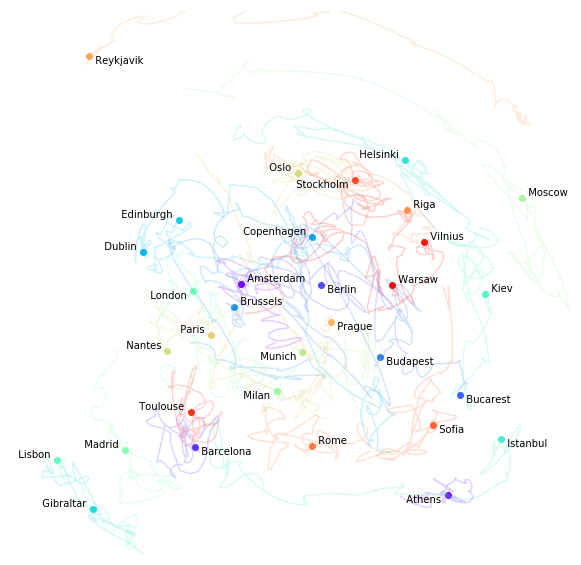

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure()
fig.set_size_inches(10, 10)

ax = fig.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_axis_off()

# Trimming the final image

bx = min(res[:, 0]), max(res[:, 0])
dx = bx[1] - bx[0]
ax.set_xlim(bx[0] - .1*dx, bx[1] + .1*dx)

by = min(res[:, 1]), max(res[:, 1])
dy = by[1] - by[0]
ax.set_ylim(by[0] - .1*dy, by[1] + .1*dy)

# label placement: subject to automatic optimization!
from collections import defaultdict
d = defaultdict(lambda: {'ha': "left", 'va': "bottom"})

for city in ["Barcelona", "Berlin", "Bucarest", "Budapest",
             "Istanbul", "Prague", "Reykjavik", "Sofia", ]:
    d[city] = {'ha': "left", 'va': "top"}
for city in ["Athens", "London", "Munich",  "Milan",
             "Stockholm", ]:
    d[city] = {'ha': "right", 'va': "top"}
for city in ["Copenhagen", "Dublin", "Edinburgh", "Gibraltar",
             "Helsinki", "Lisbon", "Madrid", "Nantes", "Oslo",
             "Paris", "Toulouse", ]:
    d[city] = {'ha': "right", 'va': "bottom"}
    
# automatic colouring
colors = cm.rainbow(np.linspace(0, 1, n))
    
for i, ((x, y), city, color) in enumerate(zip(res, cities, colors)):
    t = np.array([t[i, :] for t in path[150:]])
    ax.plot(t[:, 0], t[:, 1], color=color, alpha=.2)
    ax.scatter(x, y, color=color)
    ax.annotate("  " + city + "  ", (x, y), **d[city])

What do you think? Does that look like a reasonable map of Europe?

You might want to display different portions of the convergence path to get an idea of what is happening.

<div class="alert alert-info">
Let's wrap everything up. So far we have:
<ol>
<li> transformed a "plain words" problem description into its mathematical optimization model;
<li> characterized the family of differentiable optimization problems;
<li> recalled what a gradient is;
<li> implemented functions that compute our objective function and its gradient so that we can feed them to an optimization solver;
<li> chosen and called the `fmin_bfgs` solver from `scipy.optimize` to find an optimal solution;
<li> created a nice visualization to present the results and comment them.
</ol>
</div>

Now that we have an overview of the workflow of optimization tasks, we can dive into more details on the optimization algorithms.

# 3. <a id="part3"></a>Gradient descent

In this section, we concentrate on finding the minimum of a given differentiable function $f$. Try to keep on mind the general illustration from section 1 to keep track of why we do this.

In order to make things didactic and graphical, we shall work on functions from $\mathbb{R}^2$ to $\mathbb{R}$, which can be easily plotted (either as surfaces in 3D or as contour plots in 2D).

## 3.1 <a id="part3.1"></a>Descent algorithms

Descent algorithms define a sequence of steps "rolling down" the function's surface (similarly to how water would flow down from a mountain), that is a sequence of points $x_k$ of decreasing value $f(x_k)$. To construct this sequence, one defines at each step a descent direction $d_k$ and a descent step $\alpha_k$. The next point in the sequence is thus $x_{k+1} = x_k + \alpha_k d_k$.

Since the gradient $\nabla f$ of $f$ indicates the steepest ascent direction, $-\nabla f$ is a descent direction, hence the name **gradient descent**.

Let's illustrate that. You don't need to read the full formula of the function below, but for your curiosity, it is built as follows:
\begin{align}
&(x'_0, x'_1) = rotate_{\pi/6}(x_0,x_1)\\
&g(z_0,z_1) = \left( a_3 z_0^3 + a_2 z_0^2 + a_1 z_0 + a_0 \right) \left( b_2 z_1^2 + b_1 z_1 + b_0 \right)\\
&f(x_0,x_1) = g\left(rotate_{\pi/6} \left(x_0,x_1\right)\right)\\
&\textrm{with }[a_3, a_2, a_1, a_0] = [0.019217, 0.013158, -0.423455, -0.247614, 4.]\\
&\textrm{and }[b_2, b_1, b_0] = [0.1, 0., 0.1]
\end{align}

In [9]:
def func(x):
    a = np.pi/6.
    c = np.cos(a)
    s = np.sin(a)
    xx = c*x[0]+s*x[1]
    yy = -s*x[0]+c*x[1]
    p = np.poly1d([0.019217057452351031, 0.013158736688148412, -0.42345571095569301, -0.24761472187941180, 4.])
    q = np.poly1d([0.1, 0., 0.1])
    return p(xx)*q(yy)

def func_der(x):
    a = np.pi/6.
    c = np.cos(a)
    s = np.sin(a)
    xx = c*x[0]+s*x[1]
    yy = -s*x[0]+c*x[1]
    p = np.poly1d([0.019217057452351031, 0.013158736688148412, -0.42345571095569301, -0.24761472187941180, 4.])
    pp = np.polyder(p)
    q = np.poly1d([0.1, 0., 0.1])
    qq = np.polyder(q)
    grad0 = c*pp(xx)*q(yy) - s*qq(yy)*p(xx)
    grad1 = s*pp(xx)*q(yy) + c*qq(yy)*p(xx)
    return np.array([grad0, grad1]).T

Let's first plot this function. Again, you don't need a deep understanding of the plotting functions below.
- The first one plots a function $f$ in 3D;
- The second one plots the contour levels of function $f$ in 2D, with several options to plot the function's gradient in specific points.

An example is provided below.

In [10]:
from mpl_toolkits.mplot3d import axes3d

def plot_3d_func(f, X0, X1):
    """Plots function f over the grid of X0 and X1 arguments (X0 and X1 should be numpy arrays)."""
    X = np.meshgrid(X0, X1)
    Z = f(X)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X[0], X[1], Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.3)
    #cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

def plot_contours_func(f, X0, X1, 
                       levels = np.array([]), 
                       xp = np.empty((2,0)), 
                       plot_line = False,
                       f_der = None, 
                       add_levels=True):
    """Contour plot of function f.
    X0 and X1 should be numpy arrays defining a grid over which the contour plot will be drawn.
    levels should be a numpy array providing user-defined contour levels (otherwise, 10 regularly spaced levels are generated)
    xp should be a (2,n)-numpy array of (x0,x1)-coordinates for additional points to plot on the graph
    plot_line indicates whether a line should be plotted between the xp points
    f_der should be a function returning the derivative of f when evaluated in (x0,x1). It is used to plot the gradient in xp. If f_der=None no derivatives will be plotted
    add_levels indicates whether to add the contour levels for the xp points
    """
    X = np.meshgrid(X0, X1)
    Z = f(X)
    fig = plt.figure()
    fig.set_size_inches(10,10)
    plt.axis('equal')
    if(np.equal(len(levels),0)):
        levels = np.arange(np.min(Z), np.max(Z), (np.max(Z) - np.min(Z)) / 10.)
    if(np.not_equal(xp.shape[1],0)):
        z = f(xp)
        if(add_levels):
            levels = np.append(levels, z)
        plt.scatter(xp[0,:],xp[1,:], cmap=cm.autumn, c=-np.arange(xp.shape[1]), edgecolors='black')
        if(plot_line):
            plt.plot(xp[0,:],xp[1,:])
        if(np.not_equal(f_der,None)):
            grad = f_der(xp)
            plt.quiver(xp[0,:], xp[1,:], grad[:,0], grad[:,1])
    levels = np.sort(levels)
    cont = plt.contour(X[0],X[1],Z,levels)
    plt.clabel(cont, cont.levels, inline=True, fontsize=10)

#help(plot_3d_func)
#help(plot_contours_func)

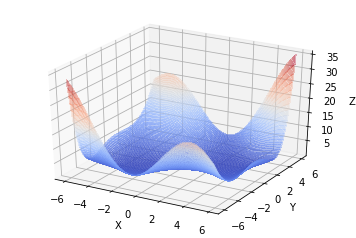

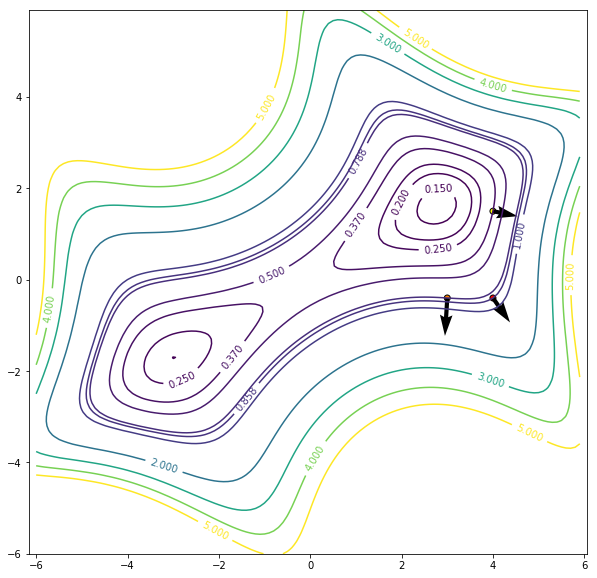

In [11]:
X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1) #Y = np.arange(-3,3,0.1)
xd = np.array([[4.,3.,4.],[1.5,-0.4,-0.4]])
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_3d_func(func, X0, X1)
plot_contours_func(func, X0, X1, levels, xp=xd, f_der=func_der)

## 3.2 <a id="part3.2"></a>Gradient descent with fixed step size

Let's take a starting point $x_0$ and write a gradient descent procedure that build the sequence of points $x_{k+1} = x_k + \alpha_k d_k$ with $d_k = -\frac{\nabla_x f(x_k)}{\|\nabla_x f(x_k)\|}$ (that is a unit vector in the opposite direction of the gradient) and a fixed step size $\alpha_k$.

<div class="alert alert-warning">**Exercice:**
<ul>
<li> Write an algorithm that starts in $(-5,-4)$ and uses gradient descent on the `func` function defined above, with fixed-length steps of length $\alpha = 0.1$, for 20 steps (if you need to compute the norm of a vector, use [`np.linalg.norm`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)).
<li> Use `plot_contours_func` to plot the sequence of points obtained.
<li> Did the algorithm find the minimum? Were there enough steps? Increase the number of steps until you reach a vicinity of the minimum.
<li> What are the coordinates of this minimum? What is the value of $f$ there? Is this a local or a global minimum?
<li> How far do you get from the true minimum?
<li> Restart your algorithm at $(4,-4)$, do you obtain the same result?
</ul>
</div>

fopt: 0.405303340008
xopt: [-4.11025344 -2.41093266]


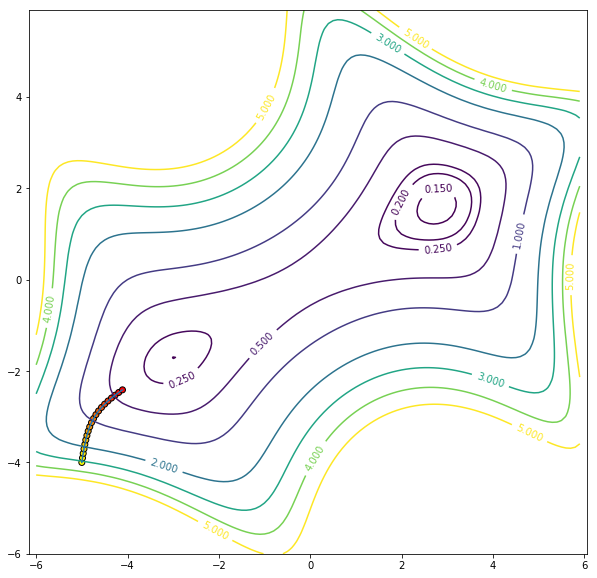

In [12]:
### YOUR CODE for (x,y)=(-5,-4)
Nsteps = 20
alpha = 0.1
X = np.zeros((Nsteps, 2))
X[0,:] = np.array([-5,-4])
for i in range(1,Nsteps):
    grad = func_der(X[i-1,:])
    d = -grad / np.linalg.norm(grad)
    X[i,:] = X[i-1,:] + alpha*d

X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func, X0, X1, levels=levels, xp=X.T, plot_line=True, add_levels=False)
print("fopt:", func(X[Nsteps-1,:]))
print("xopt:", X[Nsteps-1,:])

Recall that the gradient's norm in $x$ is the steepest increase rate of the function in $x$. So as long as this norm is non-zero, it means we can still move up or down the function's surface by following the gradient's direction. Conversely, if the gradient becomes zero, it means we have reached a "flat" area in the function's surface, which is likely to be a (local) minimum.

<div class="alert alert-warning"> **Exercice:**
Copy-paste your code from the previous cells in the cell below to modify it. We'll work from the initial point $(x_0,x_1)=(-5,-4)$ in this exercice.
<ul>
<li> Is there a better way to stop the algorithm than a predefined number of steps? For example using the gradient's norm?
<li> Plot the evolution of the gradient's norm (actually you'll see it's clearer to plot the [log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) of the gradient's norm) along the 100 first iterations. Is the norm of the gradient always a good way to control the algorithm's stopping? What happens after (around) the 34th iteration?
<li> Plot the sequence of points after iteration 34 by using `plot_contours_func` on the $[-3.05,-2.9]\times[-1.8,-1.6]$ domain.
<li> Also plot the (log of the) value of the objective function after iteration 34.
</ul>
</div>

Nb iterations 100 grad_norm = 0.0148496922699
fopt: 0.200404113932
xopt: [-3.0125636  -1.66678403]


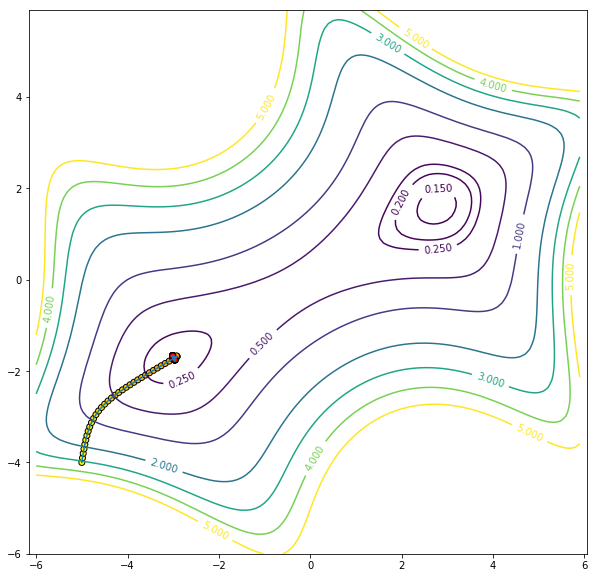

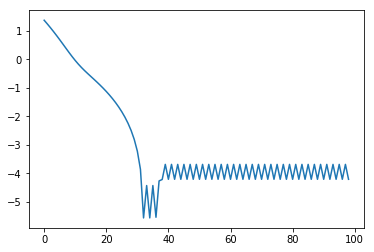

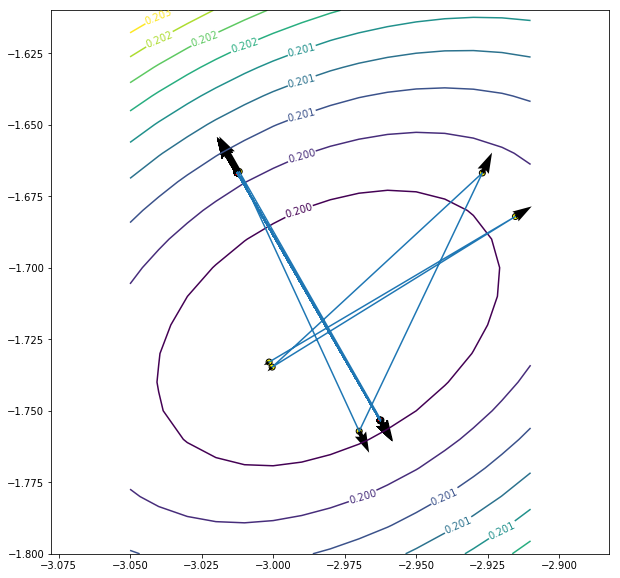

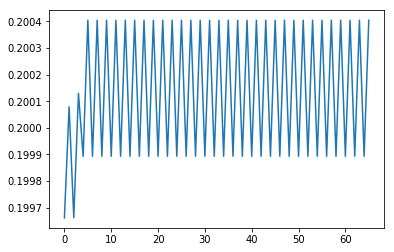

In [13]:
#### YOUR CODE

maxSteps = 100
alpha = 0.1
epsilon = 0.001
X = np.zeros((maxSteps, 2))
X[0,:] = np.array([-5,-4])
grad_norm_tab = np.zeros(maxSteps)
grad_norm = np.linalg.norm(func_der(X[0,:]))
val_tab = np.zeros(maxSteps)
val_tab[0] = func(X[0,:])
i = 1
while i<maxSteps and grad_norm>epsilon:
    grad = func_der(X[i-1,:])
    grad_norm = np.linalg.norm(grad)
    grad_norm_tab[i-1] = grad_norm
    #print("Iteration", i, "grad_norm =", grad_norm)
    d = -grad/grad_norm
    X[i,:] = X[i-1,:] + alpha*d
    val_tab[i] = func(X[i,:])
    i+=1
X = X[:i,:]
grad_norm_tab = grad_norm_tab[:i]
val_tab = val_tab[:i]

X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func, X0, X1, levels=levels, xp=X.T, plot_line=True, add_levels=False)
print("Nb iterations", i, "grad_norm =", grad_norm)
print("fopt:", func(X[i-1,:]))
print("xopt:", X[i-1,:])
plt.figure()
#print(grad_norm_tab)
plt.plot(np.log(grad_norm_tab[:-1]))
X0 = np.arange(-3.05,-2.9,0.01)
X1 = np.arange(-1.8,-1.6,0.01)
plot_contours_func(func, X0, X1, xp=X[34:,].T, plot_line=True, add_levels=False, f_der=func_der)
plt.figure()
plt.plot(val_tab[34:]);

Apparently, depending on the value of the threshold we put on the gradient's norm, the algorithm does not terminate. In all cases, fixed-step sizes do not allow us to reach the local minimum but rather oscillate around it. So it seems we need adaptive, decreasing step-sizes. Any ideas as to what values we should pick for the step-size?

## 3.3 <a id="part3.3"></a>A first attempt at adaptive step sizes

<div class="alert alert-warning"> **Exercice:** Try implementing a step-size equal to the gradient's norm (again, copy-paste your code from the previous cells to avoid rewriting everything).
<ul>
<li> Stop the algorithm when the gradient's norm falls below $0.001$
<li> How many iterations until convergence?
</ul>
</div>

Nb iterations 17 grad_norm = 0.000742406157336
fopt: 0.199617225556
xopt: [-2.97999921 -1.71938082]


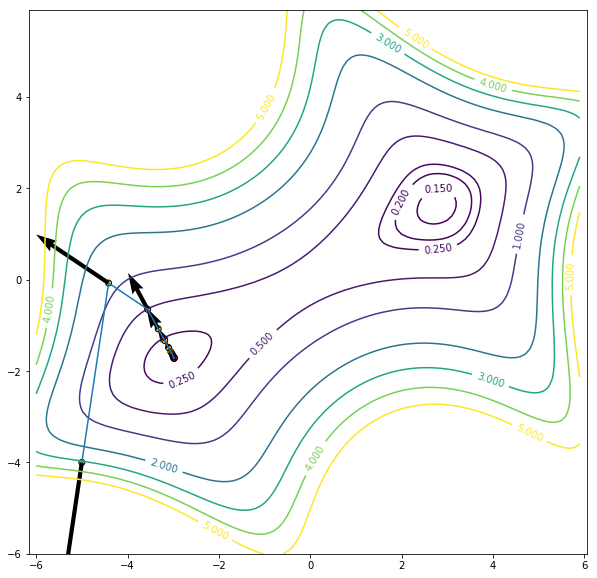

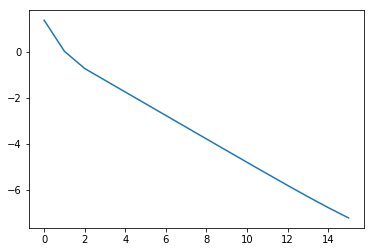

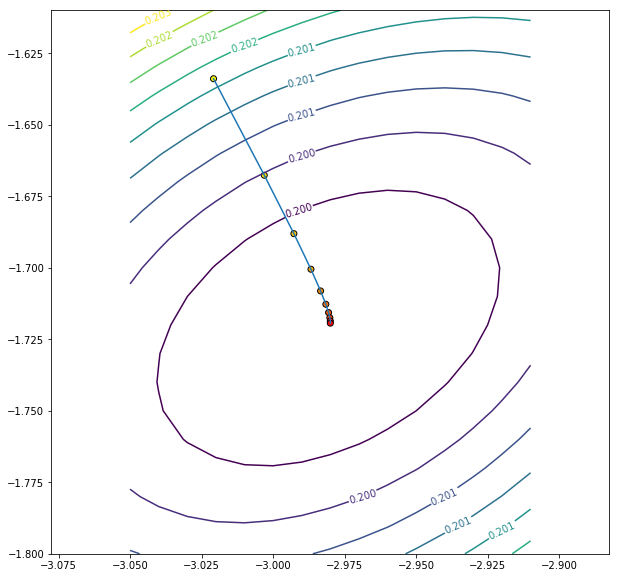

In [14]:
#### YOUR CODE
maxSteps = 30
epsilon = 0.001
X = np.zeros((maxSteps, 2))
X[0,:] = np.array([-5,-4])
grad_norm_tab = np.zeros(maxSteps)
grad_norm = np.linalg.norm(func_der(X[0,:]))
val_tab = np.zeros(maxSteps)
val_tab[0] = func(X[0,:])
i = 1
while i<maxSteps and grad_norm>epsilon:
    grad = func_der(X[i-1,:])
    grad_norm = np.linalg.norm(grad)
    grad_norm_tab[i-1] = grad_norm
    #print("Iteration", i, "grad_norm =", grad_norm)
    d = -grad
    X[i,:] = X[i-1,:] + d
    val_tab[i] = func(X[i,:])
    i+=1
X = X[:i,:]
grad_norm_tab = grad_norm_tab[:i]
val_tab = val_tab[:i]

X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func,X0,X1,levels=levels,xp=X.T, plot_line=True, add_levels=False,f_der=func_der)
print("Nb iterations", i, "grad_norm =", grad_norm)
print("fopt:", func(X[-1,:]))
print("xopt:", X[-1,:])
plt.figure()
plt.plot(np.log(grad_norm_tab[:i-1]))
X0 = np.arange(-3.05,-2.9,0.01)
X1 = np.arange(-1.8,-1.6,0.01)
plot_contours_func(func,X0,X1,xp=X[7:,:].T, plot_line=True, add_levels=False)
#plt.figure()
#plt.plot(val_tab[34:])

So apparently, taking a step length proportional to the gradient seems like a good idea. It makes sense intuitively since the norm of the gradient indicates how steep the function is locally, so, the steepest the surface, the biggest the step we can expect to make.<br>
<br>
However, this intuition can be proven very (very) wrong! In particular, taking a step size equal to the gradient's norm can be catastrophic. To convince yourself, consider the function $f(x)=10\cos(x)$ on the $[0,2\pi$] domain and check below what happens on the first step of gradient descent from $x=\pi/2$. <br>

First point x0: 1.5707963267948966
Gradient in x0: -10.0
Second point x1=x0-grad0: 11.5707963268


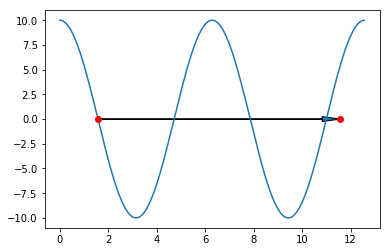

In [15]:
X = np.arange(0, 4*np.pi, 0.01)
Z = 10.*np.cos(X)
plt.figure()
plt.plot(X,Z)
x0 = np.pi/2.
val0 = 10.*np.cos(x0)
plt.plot(x0,0.,'ro')
grad0 = -10.*np.sin(x0)
x1 = x0 - grad0
val1 = 10.*np.cos(x1)
plt.arrow(x0,0., -grad0, 0., head_width=0.5, length_includes_head=True)
plt.plot(x1,0.,'ro')
print("First point x0:", x0)
print("Gradient in x0:", grad0)
print("Second point x1=x0-grad0:", x1)

## 3.4 <a id="part3.4"></a>Line search

So the gradient gives the steepest descent direction locally but this does not give any reliable information as to the best step size. We learn from this that the step size needs to adapt to the actual function in order for the sequence $f(x_k)$ to actually be decreasing. This is generally done via **line search**. Once a descent direction $d_k$ has been chosen in $x_k$, line search consists in defining the univariate function $g(\alpha)=f(x_k+\alpha\cdot d_k)$ and minimizing this function. Then, the found value for $\alpha$ is used as $\alpha_k$ and the process is repeated from $x_{k+1}=x_{k} + \alpha_k d_k$.<br>
<br>
The minimization of the scalar function $g$ can be done in a number of ways:
<ul>
<li> If $g'(\alpha)=0$ can be easily solved analytically, then it provides a series of candidates for a minimum. 
<li> Interpolation methods such as Cubic interpolation, Quadratic interpolation (Brent method) or the Golden section method (all left to your curiosity), that do not require the knowledge of an analytical form of $g'$ can be used to narrow down a minimum.
</ul>

Fortunately for us, `scipy.optimize` provides a [`minimize_scalar`](https://docs.scipy.org/doc/scipy-0.17.1/reference/generated/scipy.optimize.minimize_scalar.html) function that performs this tedious line search for us.

Those interested in going further on the topic of step size selection in descent methods can check the following advanced topics (do that later if you are curious, or you probably won't have time to finish this notebook):
<ul>
<li> Armijo rule and Wolfe conditions
<li> Goldstein rule
<li> Robbins-Monro stochastic approximation
</ul>

Before going any further, let us recall an important property. With the line search procedure we just introduced, two successive descent directions are necessarily orthogonal. Why? Simply because if $d_{k+1}$ was not orthogonal to $d_k$, that would mean there is a component of $d_{k+1}$ along $d_k$, which would mean that in $x_{k+1}$, it would still be possible to decrease $f$ just by moving along the $d_k$ direction, but this is obviously impossible since $x_{k+1}$ is the minimum of $f(x_k+\alpha\cdot d_k)$. So $d_{k+1}$ is necessarily orthogonal to $d_k$.<br>
<br>
Note that, in dimension 2, that leaves little choice for the direction $d_{k+1}$ given $d_k$. But in higher dimensions, there is an infinity of unit vectors that are orthogonal to $d_k$, so what this property says really is just that two successive descent directions are orthogonal and nothing else.
<div class="alert alert-warning"> **Exercice:** Just take a minute to make sure you understood this property.<br>
</div>
<div class="alert alert-warning">**Exercice:**<br>
Now, reuse your previous code to write a descent method where the descent direction is the normalized gradient and the step size is found by line search.<br>
<ul>
<li> Can you confirm the above property (graphically)?
<li> How many steps until convergence?
</ul>
</div>

Nb iterations 10 grad_norm = 0.000600918185623
fopt: 0.199616866833
xopt: [-2.98228805 -1.72141746]


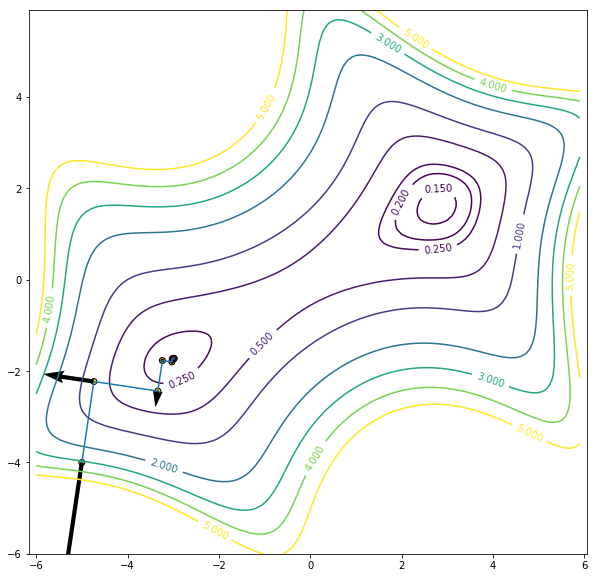

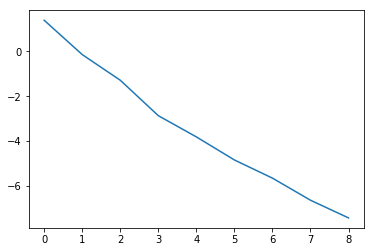

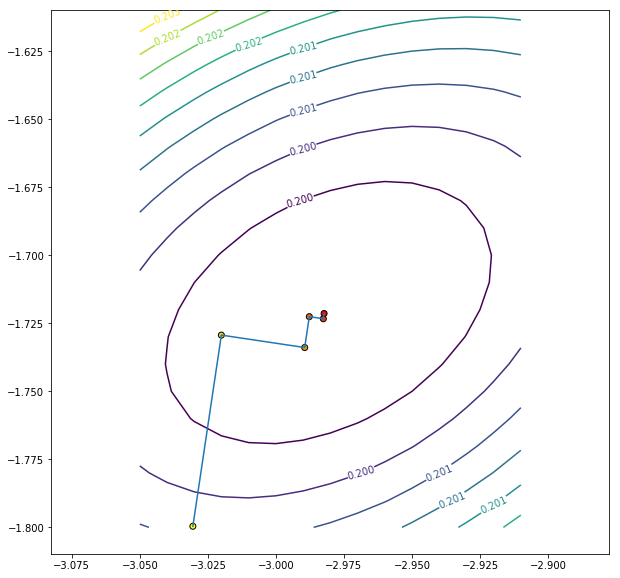

In [16]:
#### YOUR CODE
maxSteps = 19
epsilon = 0.001
X = np.zeros((maxSteps, 2))
X[0,:] = np.array([-5,-4])
grad_norm_tab = np.zeros(maxSteps)
grad_norm = np.linalg.norm(func_der(X[0,:]))
val_tab = np.zeros(maxSteps)
val_tab[0] = func(X[0,:])
i = 1
while i<maxSteps and grad_norm>epsilon:
    grad = func_der(X[i-1,:])
    grad_norm = np.linalg.norm(grad)
    grad_norm_tab[i-1] = grad_norm
    #print("Iteration", i, "grad_norm =", grad_norm)
    d = -grad/grad_norm
    def g(alpha):
        return func(X[i-1,:] + alpha*d)
    res = sopt.minimize_scalar(g)
    alpha = res.x
    X[i,:] = X[i-1,:] + alpha*d
    val_tab[i] = func(X[i,:])
    i+=1
X = X[:i,:]
grad_norm_tab = grad_norm_tab[:i]
val_tab = val_tab[:i]

X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func,X0,X1,levels=levels,xp=X.T,plot_line=True,add_levels=False,f_der=func_der)
print("Nb iterations", i, "grad_norm =", grad_norm)
print("fopt:", func(X[i-1,:]))
print("xopt:", X[i-1,:])
plt.figure()
plt.plot(np.log(grad_norm_tab[:i-1]))
X0 = np.arange(-3.05,-2.9,0.01)
X1 = np.arange(-1.8,-1.6,0.01)
plot_contours_func(func,X0,X1,xp=X[4:,:].T,plot_line=True,add_levels=False)

Did you notice the orthogonal descent directions?

## 3.5 <a id="part3.5"></a>Convexity

Let's take a step back and consider the general question of finding minimas of differentiable functions. So far, what we have intuitively done corresponds to saying that if we roll down the function's surface in the opposite direction of the gradient, we might end up in a zero-gradient point that is a local minimum.

We could do that precisely because our functions were differentiable; their gradient exists.

But the reverse implication is not true: zero-gradient points are not necessarily minimas! Consider the two following functions.

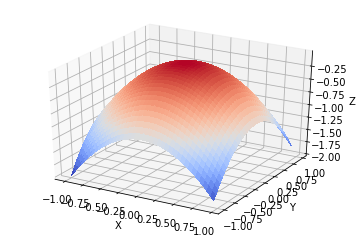

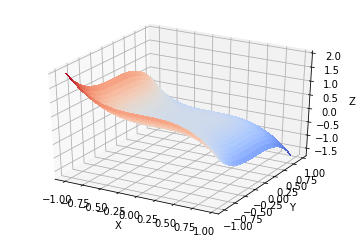

In [17]:
X0 = np.arange(-1.,1.,0.05)
X1 = np.arange(-1.,1.,0.05)
X = np.meshgrid(X0, X1)
Z = -X[0]*X[0]-X[1]*X[1]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X[0], X[1], Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Z = -X[0]*X[0]*X[0]-X[1]*X[1]*X[1]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X[0], X[1], Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

Both these functions have a null gradient in $(0,0)$ but neither have a minimum in $(0,0)$.

So "$\hat{x}$ is a minimum $\Rightarrow$ $\nabla_x f(\hat{x}) = 0$" is true but the reverse implication is false.

Take a point $x$ where the surface is flat (with a zero gradient). To guarantee that this point is a (local) minimum we need to guarantee that the fonction is (locally) **convex** around this point. Technically, that means that for any two points $y$ and $z$, if we draw a line between them, the function will actually sit below that line. Formally:
$$f\textrm{ is convex }\Leftrightarrow \forall (y,z)\in\mathbb{R}^n, \lambda \in [0,1], f(\lambda y + (1-\lambda) z) \leq \lambda f(y) + (1-\lambda) f(z)$$

Let's link that with the gradient. A zero gradient means a flat surface, not a minimum. What we were missing before is the fact that the surface goes up when we move away from the minimum. In other words, when we move away from a minimum (in *any* direction), the slope of the function must increase. This means that the derivative of the gradient must be positive. But the gradient is a vector, so its derivative is a matrix. The gradient's derivative is called the **Hessian matrix**. It is written:
$$H_f(x) = \nabla_x^2 f(x) = \left[ \begin{array}{ccc}
\frac{\partial^2 f}{\partial x_0^2}(x) & \cdots & \frac{\partial^2 f}{\partial x_0 \partial x_n}(x)\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_0 \partial x_n}(x) & \cdots & \frac{\partial^2 f}{\partial x_n^2}(x)
\end{array}\right]$$

And we have the equivalence:
$$H_f(x)\textrm{ is a positive definite matrix} \Leftrightarrow f\textrm{ in convex in }x$$

We say that a function is strictly convex in $x$ if $H_f(s)$ is positive definite. If it is only postive semi-definite, the function is only convex (not strictly). What does that mean?

Recall that a matrix $A$ is positive iff $\forall x\in\mathbb{R}^n, x^T A x \geq 0$. It is equivalent to say that a matrix is positive and that its eigen-values are strictly positive. On the other hand, the Hessian's elements indicate how fast the gradient's components increase when we slightly move away from $x$ in a given direction. So saying that the Hessian is positive is equivalent to saying that its eigen-values are all positive, which corresponds in turn to saying that the gradient increases, whatever the direction we take to move away from $x$. In the end, $H_f(x)>0$ is a very natural definition of convexity.

In particular, if the Hessian is only positive semi-definite, that means some eigen-values can be zero, which means that the gradient does not increase nor decrease in the directions of the corresponding eigen-vectors. In this case, the function is not strictly convex, just convex.

Similarly, if $f$ is convex in all possible $x$, we say it is globally convex.

Why did we go through all this?
1. First because it is important to formalize what convexity is, both geometrically (through the definition above: the function between $y$ and $z$ sits below the line that connects $f(y)$ and $f(z)$) and analytically (the Hessian is positive definite in all $x$).
2. Because we will now use this characterization of convexity to look at the function's shape (and not only the gradient) to improve our gradient descent.

## 3.6 <a id="part3.6"></a>Adapting the descent directions to the function's conditioning

Let us now take a look at a last issue in descent methods. In the previous example, you may have noticed the sequence of points keeps bouncing off the "walls" of the surface, moving in consecutive orthogonal directions. That would actually be perfect if these "walls" were circular because in that case the first gradient would directly point to the minimum. Unfortunately, in real life, functions are rarely so well-behaved. Still, wouldn't it be nice to have a series of descent directions that automatically adapt to the local shape of the function?

Formally, the local *conditioning* of a convex function in $x$ is the ratio $\frac{M}{m}$ between the biggest and the smallest eigen-value of its Hessian matrix $H=\nabla^2 f(x)$ in $x$. Graphically, the conditioning measures how "well-behaved" is the function for gradient descent (that is how "circular" are the contour lines). A well-conditioned function locally looks like a circular crater (and the conditioning is close to 1), while an ill-conditioned function locally looks like the grand canyon (and the conditioning is large).

Let's illustrate this on the two functions $f_0(x_0,x_1) = x_0^2+x_1^2$ and $f_1(x_0,x_1) = x_0^2+10x_1^2$.

<div class="alert alert-warning">**Exercice:**
<ul>
<li> What are the Hessian matrices of $f_1$ and $f_2$? Do these matrices depend on $x$?
<li> What is the conditioning of $f_1$? And $f_2$?
</ul>
</div>

Let's illustrate that graphically.

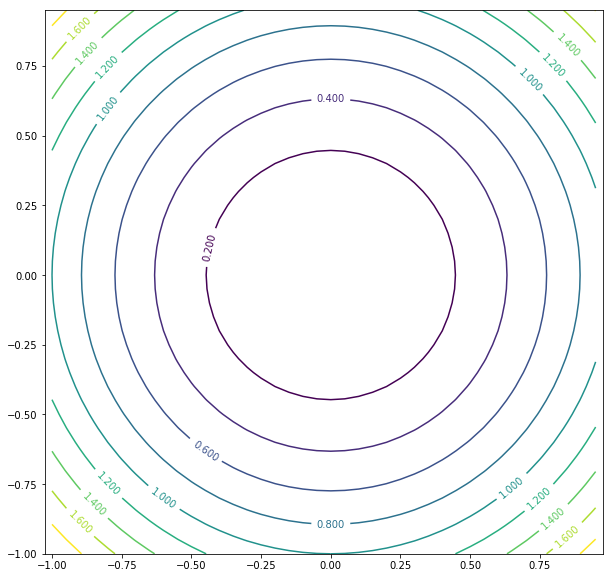

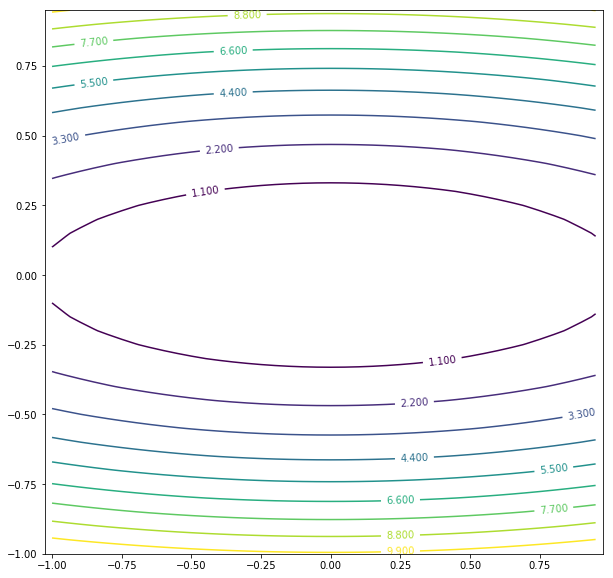

In [18]:
def func0(x):
    return x[0]*x[0]+x[1]*x[1]

def func1(x):
    return x[0]*x[0]+10*x[1]*x[1]

X0 = np.arange(-1,1,0.05)
X1 = np.arange(-1,1,0.05)
#levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func0,X0,X1)
plot_contours_func(func1,X0,X1)

Interestingly, changing the basis vectors (that is, changing the coordinates system) used to describe our function, changes its conditioning. Recall old memories of linear algebra: if you change the coordinate systems by moving from the canonical basis to the basis formed by the eigen-vectors of the Hessian matrix, then, locally, you get a perfect conditioning of $1$.<br>
<br>
So, locally in $x$, for a convex function, there exists a basis in which the function is well-conditioned and we would prefer to express the gradient in this basis in order to define a descent direction. It so happens (as said in the previous paragraph) that the basis-change matrix for such a change of coordinates is precisely the Hessian in $x$.<br>
<br>
The idea of the Conjugate Gradients method is to take successive descent directions that, instead of being orthogonal to each other in the standard coordinate system ($d_k^Td_{k+1} = 0$) are orthogonal to each other in the basis spanned by the columns of the Hessian $H$ in $x$, that is $d_k^THd_{k+1} = 0$.<br>
<br>
Such descent directions are said to be $H$-conjugate. The property of the Conjugate Gradients method is that it adapts to the local shape of the function. One can prove that by taking successive conjugate descent directions, one finally reaches the function's minimum. In practice, we can expect the Conjugate Gradients method to converge faster than plain gradient descent precisely because it avoids the "bouncing phenomenon" on the function's contour lines.<br>
<br>
To simplify the notations, from now on, we shall write $g_k = \nabla_x f(x_k)$ the function's gradient in point $x_k$.<br>
<br>
In practice, one wants to avoid computing the Hessian at each step to find the next descent direction. Because the sequence of gradients generated by line search are orthogonal to each other, finding the current descent direction $d_k$ that is $H$-conjugate to all previous descent directions, can actually be simplified to an iterative formula that only requires the knowledge of the current gradient $g_k$ and the previous descent direction $d_{k-1}$.<br>
<br>
In the case of quadratic functions (constant Hessian), the consecutive descent directions are generated by:
$$d_{k} = -g_k + \frac{\left(g_k\right)^T g_k}{(g_{k-1})^Tg_{k-1}} d_{k-1}$$

In the general case, Conjugate Gradients methods incrementally construct the sequence of descent directions using the Fletcher-Reeves or the Polak-Ribière formula. The later is the most commonly used one:
$$d_{k} = -g_k + \frac{\left(g_k\right)^T \left(g_k - g_{k-1} \right)}{(g_{k-1})^Tg_{k-1}} d_{k-1}$$
<br>
Recall that as previously, in a Conjugate Gradient method, the step-size is found by line search.<br>
<br>
Implementing a Conjugate Gradients method can be a little tedious and we won't have the time during this class to do it. However, `scipy.optimize` provides a [`fmin_cg`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html) function (which is actually equivalent to calling the function [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the argument `method='CG'`). Run the code below to see the descent performed by the CG method.

Optimization terminated successfully.
         Current function value: 0.199617
         Iterations: 10
         Function evaluations: 20
         Gradient evaluations: 20
[[-5.         -4.        ]
 [-4.85106719 -3.00104103]
 [-4.26824781 -2.2833877 ]
 [-2.18545591 -1.86319985]
 [-2.0772997  -1.64505431]
 [-2.43970814 -1.41815763]
 [-3.07050204 -1.74048893]
 [-3.06989534 -1.75188894]
 [-2.98876278 -1.7442493 ]
 [-2.98163825 -1.72122565]
 [-2.98116114 -1.72117362]]


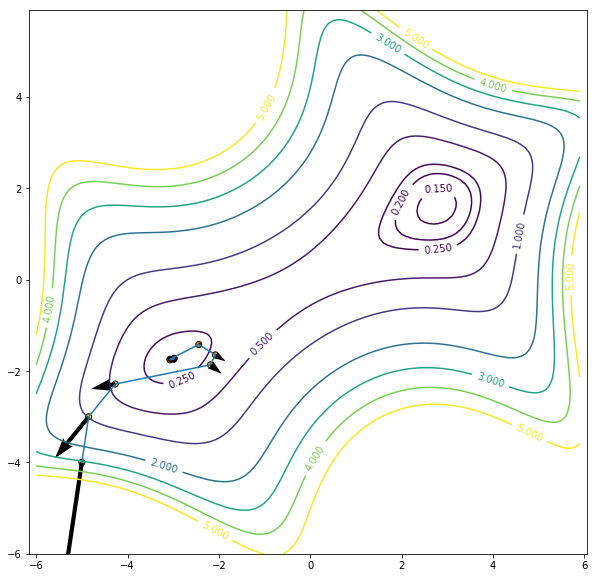

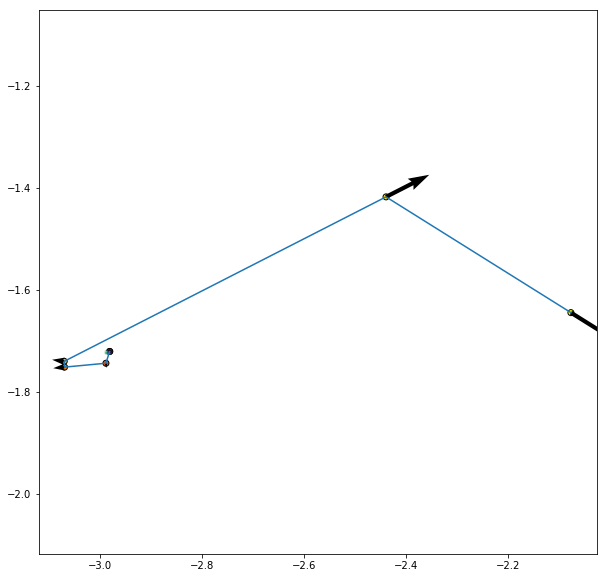

In [19]:
x0 = np.array([-5,-4])
res = sopt.fmin_cg(func, x0, fprime=func_der, retall=True, disp=True)
xopt = res[0]
steps = np.array(res[1])

print(steps)
X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func,X0,X1,levels=levels,xp=steps.T,plot_line=True,add_levels=False,f_der=func_der)
X0 = np.arange(-2.99,-2.98,0.001)
X1 = np.arange(-1.726,-1.720,0.001)
plot_contours_func(func,X0,X1,xp=steps[4:,:].T,plot_line=True,add_levels=False,f_der=func_der)

<div class="alert alert-warning">**Exercice:** Given all the experiments carried out in this section, with the same function and the same initialization of the search, fill the "number of steps before convergence" column in the table below.
</div>

| Algorithm                              | Number of steps before convergence |
|----------------------------------------|------------------------------------|
| Gradient descent with fixed step sizes | ?                                  |
| Gradient descent with line search      | ?                                  |
| Conjugate gradients with line search   | ?                                  |

<div class="alert alert-warning">**Exercice:**
How many steps does it take to a conjugate gradients method to converge on the quadratic, ill-conditioned $f_1(x_0,x_1) = x_0^2+10x_1^2$ (`func1`) function?
</div>

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
[[ -8.00000000e-01  -7.00000000e-01]
 [ -7.19060820e-01   8.21782903e-03]
 [  9.15483134e-10  -8.03993922e-09]]


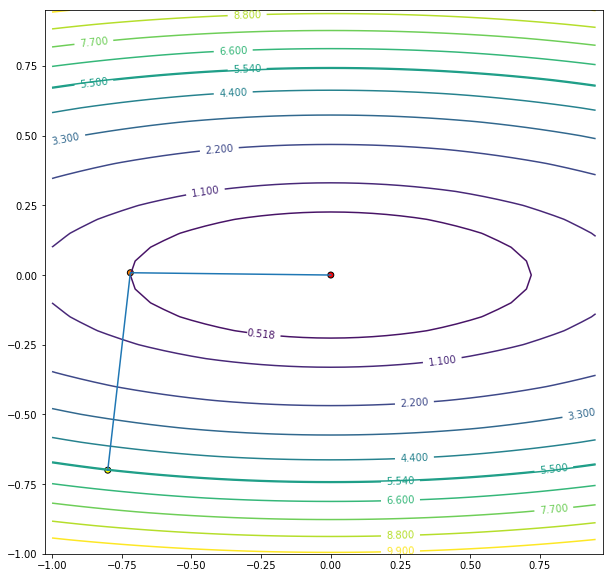

In [20]:
x0 = np.array([-0.8,-0.7])
res = sopt.fmin_cg(func1, x0, retall=True, disp=True)
xopt = res[0]
steps = np.array(res[1])

print(steps)
X0 = np.arange(-1,1,0.05)
X1 = np.arange(-1,1,0.05)
plot_contours_func(func1,X0,X1,xp=steps.T,plot_line=True,add_levels=True)

<div class="alert alert-info">
Let's wrap everything up. In this section we have focused on gradient descent methods. We have seen that:
<ol>
<li> Descent methods define a sequence $x_{k+1} = x_k + \alpha_k d_k$, where $d_k$ is a descent direction and $\alpha_k$ is the step size.
<li> The opposite of the gradient gives a descent direction.
<li> The step size needs to be adapted to guarantee convergence. For this, we introduced line search and its properties.
<li> The conjugate gradients method takes descent directions that account for the local shape (convexity, conditioning) of the function and converge faster.
</ol>
</div>

# 4. <a id="part4"></a>Constrained optimization

In the previous section, we have considered problems of the form $\min_x f(x)$. But in the aircraft design example of section 2, we saw that the general form of an optimization problem is rather:
\begin{gather}
\min_x f(x)\\
h(x) \leq 0\\
g(x) = 0
\end{gather}

It seems the gradient descent methods introduced in the previous section cannot take constraints into account and thus cannot cope with general optimization problems. We won't detail any theory in this section concerning how we can solve such problems; sections 6 and 7 (both optional for this class) are here to satisfy your curiosity in that matter. Instead, we will simply give an example of how these problems can be solved *approximately* using the [`scipy.optimize.fmin_slsqp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_slsqp.html) function.

We shall keep the same example function as in the previous section and add two constraints:
\begin{gather}
x_1 \leq -0.8 x_0\\
x_1 \leq 2-0.9 x_0^2
\end{gather}

In the code below we shade out in blue the area forbidden by the first constraint and in orange the area forbidden by the second.

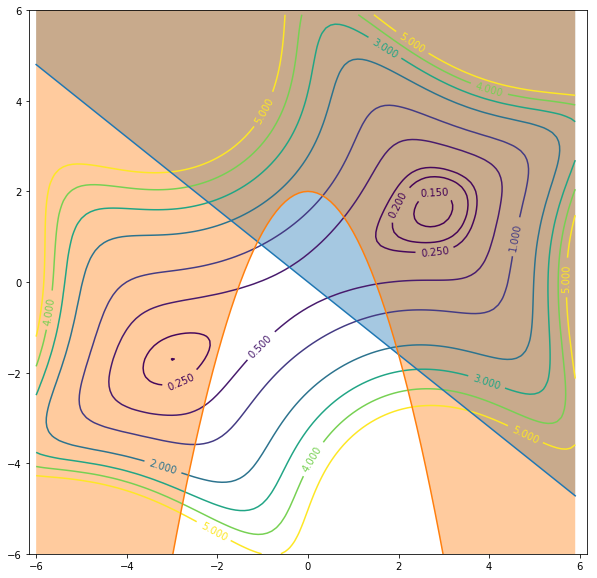

In [21]:
X0 = np.arange(-6.,6.,0.1)
X1 = np.arange(-6.,6.,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func, X0, X1, levels=levels)

# constraint 1
a  = 0.
a0 = 0.8
a1 = 1.
H = -(a+a0*X0)/a1
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)

# constaint 2
b  = -2.
b0 = 0.9
b1 = 1.
H = -(b+b0*X0*X0)/b1
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)

plt.xlim([-6.,6.])
plt.ylim([-6.,6.]);

Our inequality constraint function $h$ is thus:
$$h(x) = \left(\begin{array}{c}0.8x_0 + x_1\\ 0.9x_0^2 + x_1-2\end{array}\right)\textrm{with }h(x)\leq 0$$
And there is no equality constraint function $g$.

Note that [`scipy.optimize.fmin_slsqp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_slsqp.html) adopts the convention of positive constraints $h(x)\geq 0$.

In [22]:
def ineq_constr(x):
    return -np.array([a0*x[0]+a1*x[1]+a, b0*x[0]*x[0]+b1*x[1]+b])

def ineq_constr_der(x):
    return -np.array([[a0, a1],[b0*x[0], b1]])

x0 = np.array([-5,-4])
x0 = np.array([0,-2])
#maxiter = 100
#iteration=0
#X = np.empty((maxiter,2))
#X[0,:] = x0[:]
X = [x0]

def store_x(x):
    #print("current solution:", x)
    #iteration += 1
    #X[iteration,:] = x[:]
    X.append(np.copy(x))
    return

res = sopt.fmin_slsqp(func, x0, f_ieqcons=ineq_constr, 
                      fprime=func_der, fprime_ieqcons=ineq_constr_der, 
                      disp=2, iter=12, callback=store_x)
X = np.array(X)

  NIT    FC           OBJFUN            GNORM
    1     1     1.532087E+00     1.345729E+00
    2     2     4.292587E-01     3.099720E-01
    3     3     3.608999E-01     7.779763E-02
    4     4     3.536249E-01     8.389924E-02
    5     5     2.931189E-01     1.444890E-01
    6     6     3.072952E-01     9.818702E-02
    7     8     2.764413E-01     1.074722E-01
    8    11     2.730332E-01     1.200424E-01
    9    13     2.726111E-01     1.498179E-01
   10    14     2.812383E-01     1.952143E-01
   11    25     2.812383E-01     1.952143E-01
   12    36     2.812383E-01     1.952143E-01
   13    47     2.812383E-01     1.952143E-01
Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.28123833174634255
            Iterations: 13
            Function evaluations: 47
            Gradient evaluations: 13


[-1.9798218  -1.52076506]


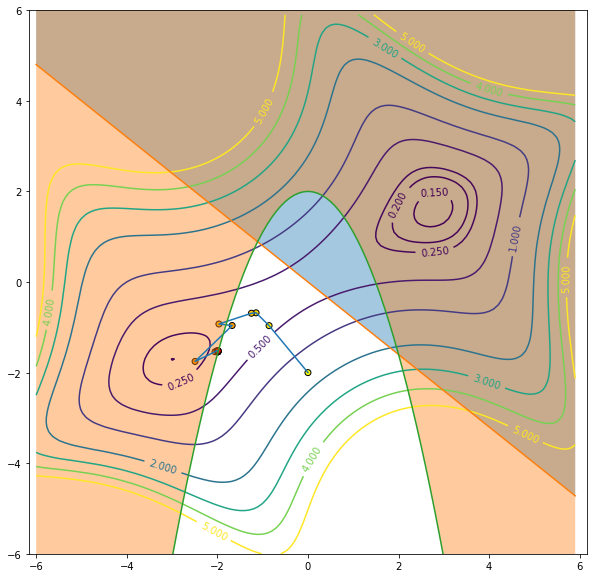

In [23]:
# Plot the solution

X0 = np.arange(-6.,6.,0.1)
X1 = np.arange(-6.,6.,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func, X0, X1, xp=X.T, plot_line=True, levels=levels, add_levels=False)

# constraint 1
H = -(a+a0*X0)/a1
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)

# constaint 2
H = -(b+b0*X0*X0)/b1
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)

plt.xlim([-6.,6.])
plt.ylim([-6.,6.])

print(res)

# 5. <a id="part5"></a>Newton's method

Section 3 introduced gradient descent methods and their different flavours, pitfalls and a first call to the `scipy.optimize` functions. Gradient methods feature a great simplicity in exchange for a slow convergence (a large number of steps required to reach an optimum).<br>

We progressively introduced a little complexity to solve the issues we encountered (line search for step size and conjugate gradients for descent directions) but the overall computation remains rather simple. In the trade-off between single-step computation complexity and convergence rate, we shall now take a look at the opposite extreme: Newton's method, which is arguably the most complex but also the fastest converging gradient method.<br>
<br>
The intuition behind Newton's method consists in searching for points $x_k$ that are likely to cancel $\nabla_x f(x_k)$ (instead of the previous search for points that decrease the value of $f(x_k)$). For simplicity, let's write $F(x) = \nabla_x f(x)$. Then, the first order approximation of $F$ is:
$$F(x+d) = F(x) + \nabla_x F(x)\cdot d + o(d)$$
In order to have $F(x+d)=0$, one should take $d = -\left[\nabla_x F(x)\right]^{-1}F(x)$. Replacing $F$ by $\nabla_x f(x)$ we get:
$$d = -\left[\nabla_x^2 f(x)\right]^{-1}\nabla_x f(x)$$
<br>
This defines Newton's method: $x_{k+1} = x_k - \left[\nabla_x^2 f(x_k)\right]^{-1}\nabla_x f(x_k)$<br>
<br>
Let's simplify the notation again by writing $H_k = \nabla_x^2 f(x_k)$ and $g_k=\nabla_x f(x_k)$. So Newton's method is defined by:  $x_{k+1} = x_k - (H_k)^{-1}g_k$<br>
<br>
Although this method seems appealing (it converges to the global minimum in a single step for quadratic functions!), computing and inverting the Hessian at each step is quite cumbersome. Recall that the general complexity for inverting an $n\times n$ matrix (via Gaussian elimination of Cholesky factorization for instance) is $O(n^3)$. For large values of $n$ (for optimization problems with lots of variables), this might prove too costly, especially if we have to do it in each $x_k$. There are two main alternatives to this:
<ul>
<li> Compute $d_k$ as an approximate version of $-(H_k)^{-1}g_k$
<li> Compute $B_k$ as an approximation of $(H_k)^{-1}$ and set $d_k = -B_k g_k$
</ul>
<br>
The first method is known as the *Truncated Newton method* or the *Newton - Conjugate Gradient method*. It works by remarking that $d_k = -(H_k)^{-1}g_k$ is the optimal solution of the minimization problem:
$$\min \phi(d) = \frac{1}{2} d^T H_k d - (g_k)^T d$$
The gradient of $\phi$ is easy to estimate:
$$\nabla_x \phi(d) = H_k d - g_k$$
So we can apply a Conjugate Gradients method to find a close approximation to $d$, given the Hessian $H_k$, without having to invert it. Note that this method still requires to compute $H_k$ but avoids the costly matrix inversion.<br>
<br>
In `scipy.optimize`, this is implemented in the [`fmin_ncg`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_ncg.html) function (or equivalently, by calling [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the `method='Newton-CG'` argument). You can also check the [`fmin_tnc`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html) function for an alternate version.
<div class="alert alert-warning">**Exercice:** Your turn to play. Use the `fmin_ncg` function to find the minimum of `func`. You can adapt what was done with conjugate gradients in the previous exercice (use the documentation!). The function's Hessian is provided below.
</div>

In [24]:
def func_hess(x):
    a = np.pi/6.
    c = np.cos(a)
    s = np.sin(a)
    xx = c*x[0]+s*x[1]
    yy = -s*x[0]+c*x[1]
    p = np.poly1d([0.019217057452351031, 0.013158736688148412, -0.42345571095569301, -0.24761472187941180, 4.])
    pp = np.polyder(p)
    ppp = np.polyder(pp)
    q = np.poly1d([0.1, 0., 0.1])
    qq = np.polyder(q)
    qqq = np.polyder(qq)
    h_xx = c*c*ppp(xx)*q(yy) - 2.*c*s*qq(yy)*pp(xx) + s*s*qqq(yy)*p(xx)
    h_xy = c*s*ppp(xx)*q(yy) + (c*c-s*s)*qq(yy)*pp(xx) - s*c*qqq(yy)*p(xx)
    h_yy = s*s*ppp(xx)*q(yy) + 2.*c*s*qq(yy)*pp(xx) + c*c*qqq(yy)*p(xx)
    return np.array([[h_xx,h_xy],[h_xy,h_yy]])

Optimization terminated successfully.
         Current function value: 0.199617
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 16
         Hessian evaluations: 8
[[-5.         -4.        ]
 [-4.88221495 -3.20996302]
 [-4.58564256 -2.5702359 ]
 [-3.5817781  -2.16909848]
 [-3.1993233  -1.7859421 ]
 [-3.00020056 -1.72978927]
 [-2.9813343  -1.72127333]
 [-2.98116137 -1.72117432]
 [-2.98116137 -1.72117432]]


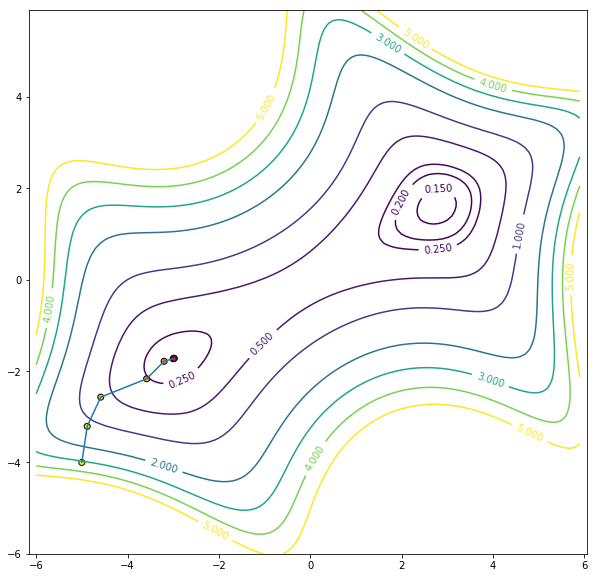

In [25]:
### YOUR CODE
x0 = np.array([-5,-4])
res = sopt.fmin_ncg(func, x0, fprime=func_der, fhess=func_hess, retall=True)
xopt = res[0]
steps = np.array(res[1])

print(steps)
X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func,X0,X1,levels=levels,xp=steps.T,plot_line=True,add_levels=False)

The second family of methods (the one that computes $B_k$ as an approximation of $\left[\nabla^2 f(x_k)\right]^{-1}$ and set $d_k = -B_k g_k$) is known as *quasi-Newton methods*. The intuition behind quasi-Newton methods relies on the following remark:
$$\nabla f(x_{k+1}) - \nabla f(x_k) \approx \nabla^2 f(x_{k+1}) \left(x_{k+1}-x_k\right)$$

Or with the simplified notations: $g_{k+1}-g_k \approx H_{k+1} \left(x_{k+1}-x_k\right)$. <br>
Suppose that $H=\nabla^2 f(x)$ does not vary too much with $x$. Suppose also that one has kept track of $n$ independent vectors $d_k = x_{k+1}-x_k$ and $n$ other independent vectors $\sigma_k = g_{k+1} - g_k$. Then it becomes possible to use those vectors to approximate $H=\nabla^2 f(x)$ and, more usefully, $H^{-1}=\left[\nabla^2 f(x)\right]^{-1}$:
$$H=\nabla^2 f(x) \approx \left[ \sigma_0 \ldots \sigma_{n-1} \right]\left[ d_0 \ldots d_{n-1} \right]^{-1}$$
$$H^{-1}=\left[\nabla^2 f(x)\right]^{-1} \approx B=\left[ d_0 \ldots d_{n-1} \right]\left[ \sigma_0 \ldots \sigma_{n-1} \right]^{-1}$$
<br>
The key here is that this operation can be performed incrementally, that is one can simply update the current value of $B$ when a new pair $(d,\sigma)$ is obtained.<br>
<br>
The most well-known quasi-Newton method is called BFGS (from the author's names: Broyden, Fletcher, Goldfarb, Shanno). The update formula for BFGS, given a new $(d,\sigma)$ is:
$$B \leftarrow B + \frac{\left(d^T\sigma + \sigma^TB\sigma\right)\left(dd^T\right)}{\left(d^T\sigma\right)^2} - \frac{B\sigma d^T+d\sigma^TB}{d^T\sigma}$$

The main advantage of quasi-Newton methods is that they converge fast without requiring neither the computation of the Hessian matrix, not its inversion. On the other hand, their main drawback is that one has to compute and store $B_k$ at each iteration.<br>
<br>
Again, `scipy.optimize` provide a function for BFGS: [`fmin_bfgs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html) (or [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the `method='BFGS'` option).<br>
<br>
Note that BFGS stores big matrices in memory. A so-called "limited memory" version of BFGS, called L-BFGS is available under the [`fmin_l_bfgs_b`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_l_bfgs_b.html) function (or [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) with the `method=L-BFGS-B` option). Today, L-BFGS is considered the method of choice for non-linear optimization in a wide variety of applications.
<div class="alert alert-warning">**Exercice:** Your turn to play. Use the `fmin_bfgs` function to find the minimum of `funcx`.
</div>

Optimization terminated successfully.
         Current function value: 0.199617
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
[[-5.         -4.        ]
 [-4.85106719 -3.00104103]
 [-4.21868804 -2.7510838 ]
 [-3.40645294 -2.34181354]
 [-3.07937466 -2.12885975]
 [-2.91785706 -1.96377775]
 [-2.85253918 -1.82007981]
 [-2.8660423  -1.72075367]
 [-2.91983702 -1.69775803]
 [-2.9712712  -1.71006671]
 [-2.98130836 -1.71956531]
 [-2.9812722  -1.72111649]
 [-2.98116482 -1.7211754 ]]


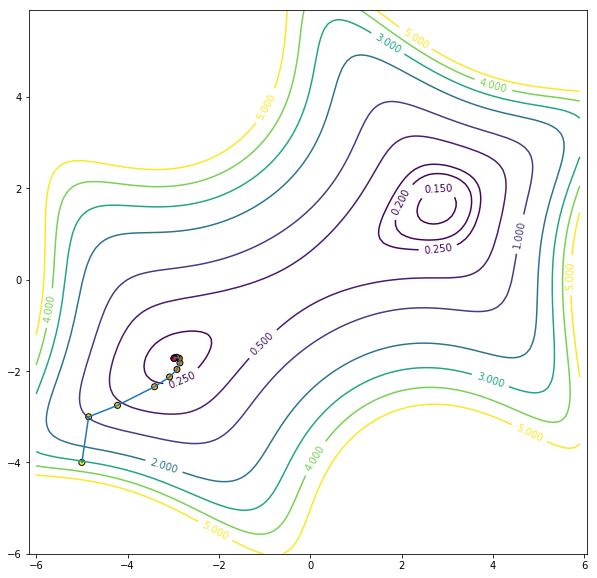

In [26]:
### YOUR CODE
x0 = np.array([-5,-4])
res = sopt.fmin_bfgs(func, x0, fprime=func_der, retall=True)
xopt = res[0]
steps = np.array(res[1])

print(steps)
X0 = np.arange(-6,6,0.1)
X1 = np.arange(-6,6,0.1)
levels = np.array([0.15, 0.2, 0.25, 0.5, 1., 2., 3., 4., 5.])
plot_contours_func(func,X0,X1,levels=levels,xp=steps.T,plot_line=True,add_levels=False)

# 6. <a id="part6"></a>Introduction to the Karush-Kuhn-Tucker theory

## 6.1 <a id="part6.1"></a>A graphical introduction

Let's take a step back and reconsider our original problem. We wrote in the introduction that we wanted to solve:
$$\min_x f(x)$$
$$\textrm{under the constraints }h(x)\leq 0$$
So far we have only done unconstrained optimization. Let's take a look into taking these constraints into account.

This section aims at gently introducing the Karush-Kuhn-Tucker theorem for constrained optimization, from an intuitive and graphical perspective.<br>
There is no code for you to write here, just follow the reasoning. The final goal of this part is to give you an intuition as to where the Lagrangian formulation comes from and how you can naturally come up with it.<br>
<br>
Let's consider a new function $f(x_0,x_1)= x_0^2 + x_0x_1+ 2x_1^2$ that we want to minimize.<br>
It is easy to see that the minimum of $f$ without constraints is at $(x_0,x_1)=(0,0)$ and that this minimum is global. <br>
We now add the constraint that $h(x_0,x_1) = 0.8x_0+x_1-a\leq 0$, $a$ being a scalar parameter that we will play with.<br>
The Python functions returning $f(x)$, $\nabla_x f(x)$, $\nabla_x^2 f(x)$, $h(x)$, $\nabla_x h(x)$, and $\nabla_x^2 h(x)$ are provided below.<br>
Run the code below to plot the contour lines of the function and display the admissible domain (for a value of $a=-5$). The shaded area is the forbidden one.


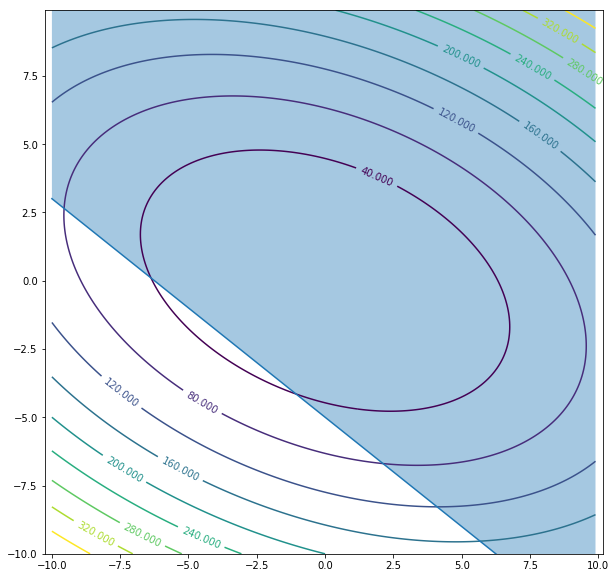

In [27]:
def f(x):
    return x[0]**2 + x[0]*x[1] +2.*x[1]**2
def f_der(x):
    return np.array([2.*x[0] + x[1], x[0]+4.*x[1]]).T
def f_hess(x):
    return np.array([[2., 1.],[1., 4.]])

a = -5.
def h(x):
    return .8*x[0]+x[1]-a
def h_der(x):
    return np.array([.8, 1]).T
def h_hess(x):
    return np.zeros((2,2))

def h_plot(x):
    return a-.8*x

X0 = np.arange(-10.,10.,0.1)
X1 = np.arange(-10.,10.,0.1)
plot_contours_func(f,X0,X1)
H = h_plot(X0)
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)
plt.xlim([-10.,9.9])
plt.ylim([-10.,9.9]);

Let's change the value of the parameter $a$ in the example code above.
<ul>
<li> For $a=6$ where is the minimum of $f(x)$ such that $h(x)\leq 0$?
<li> For $a=-5$ where is the minimum of $f(x)$ such that $h(x)\leq 0$?
<li> For $a=0$    where is the minimum of $f(x)$ such that $h(x)\leq 0$?
</ul>

From these observations, one can generalize that if the global minimum $x^*$ of $f$ is *inside* the admissible domain defined by the constraints, then the minimum of $f$ under these constraints is still found in $x^*$.<br>
<br>
The question now is: how can we characterize the minimum of $f$ under constraints, when the constraints exclude $x^*$ from the admissible domain?<br>
<br>
Let's work with the $a=-5$ case and let's try to perform a single step of gradient descent with line search from the admissible point $(2,-8)$.

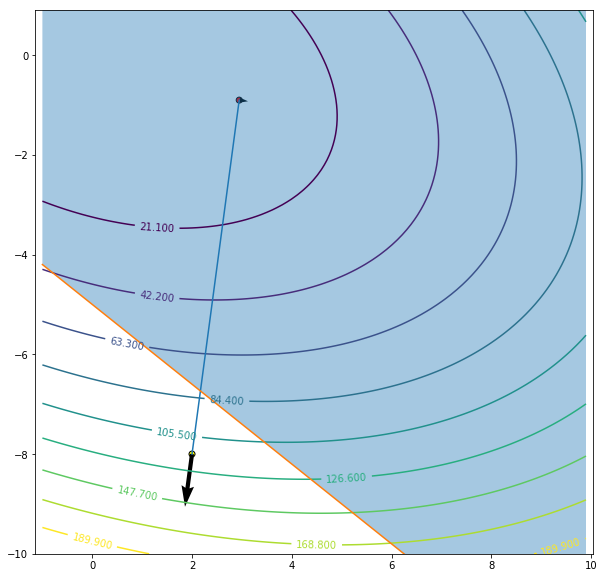

In [28]:
x0 = np.array([2.,-8.])

# Gradient descent with line search
d0 = -f_der(x0) / np.linalg.norm(f_der(x0))
def g0(alpha):
    return f(x0 + alpha*d0)
res = sopt.minimize_scalar(g0)
alpha0 = res.x
x1 = x0 + alpha0*d0

# Display
X = np.array([x0,x1])
X0 = np.arange(-1.,10.,0.1)
X1 = np.arange(-10.,1.,0.1)
plot_contours_func(f,X0,X1,xp=X.T,plot_line=True,f_der=f_der,add_levels=False)
H = h_plot(X0)
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)
plt.xlim([-1.,9.9])
plt.ylim([-10.,0.9]);

We notice that the new point $x_1$ is outside of the admissible domain. We should have seen this coming. In order to avoid leaving the admissible domain, we can change the line search method so that it stops when hitting the constraint. Let's do that by hand for now. Let $x_{inter} = x_0 + \alpha_{inter}d_0$ be the intersection of the constraint and the descent line. $\alpha_{inter}$ is thus a solution to the equation $h(x_0+\alpha d_0)=0$. We could solve that by hand, but let's use the [`brentq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) function of `scipy.optimize` that finds roots to scalar functions, just to practice.

In [29]:
#The intersection between the gradient's line and the constraint
def g00(alpha):
    return h(x0+alpha*d0)
alpha_inter = sopt.brentq(g00,0.,10.)

Now let's start again from $x_0$ by imposing an upper bound on $\alpha$.

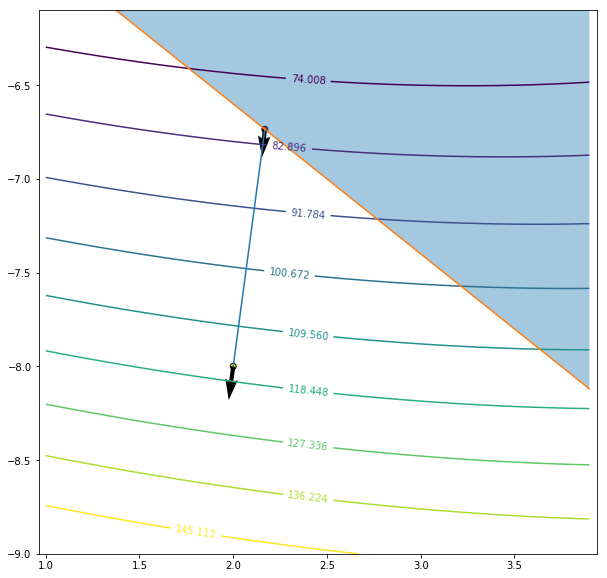

In [30]:
# Line search with the upper bound on alpha
d0 = -f_der(x0) / np.linalg.norm(f_der(x0))
def g0(alpha):
    return f(x0 + alpha*d0)
res = sopt.minimize_scalar(g0,bounds=[0,alpha_inter],method='Bounded')
alpha0 = res.x
x1 = x0 + alpha0*d0

# Display
X = np.array([x0,x1])
X0 = np.arange(1.,4.,0.1)
X1 = np.arange(-9.,-6.,0.1)
plot_contours_func(f,X0,X1,xp=X.T,plot_line=True,f_der=f_der,add_levels=False)
H = h_plot(X0)
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)
plt.xlim([1.,3.9])
plt.ylim([-9.,-6.1]);

So now we've hit the constraint and the new gradient would pull us out of the admissible domain. However, there must be some component of this gradient that allows us to move downwards by following the constraint.<br>
Let's decompose this gradient in $x_1$ into a component that is orthogonal to the constraint (thus collinear with the constraint's gradient) and the remainder $d_1$ (that is thus parallel to the constraint).<br>
By following $d_1$ we stay within the admissible domain and we can reach a new minimum via line search.

[ 2.16867414 -6.73494398]
[-0.78086881  0.62469505]


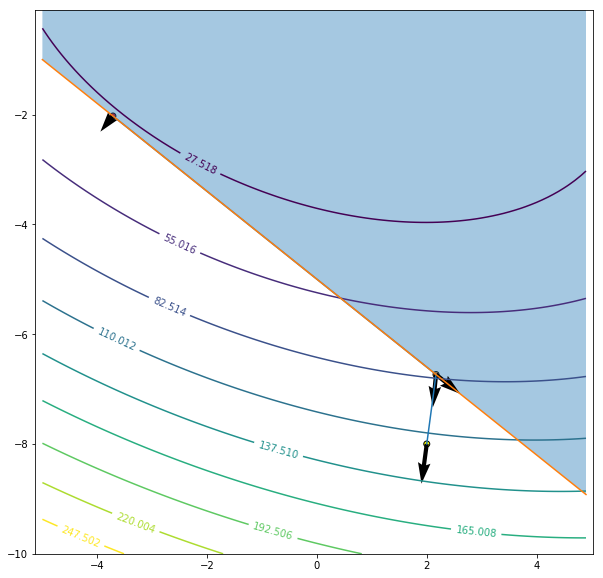

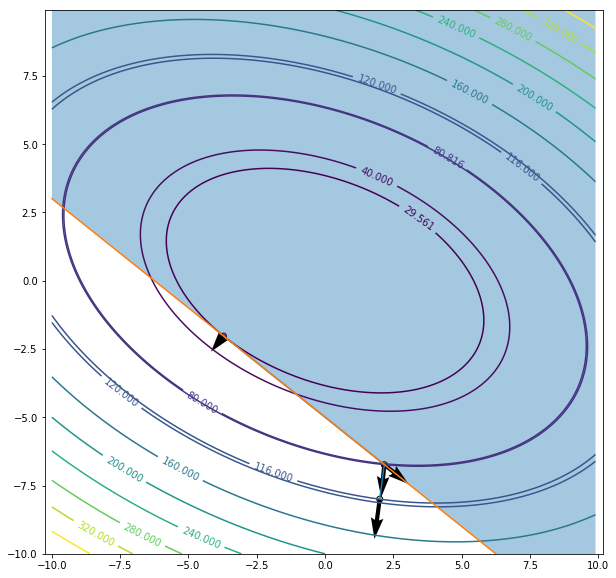

In [31]:
# Remove the component of the descent direction that is collinear to gradient
u_grad = h_der(x1) / np.linalg.norm(h_der(x1))
d = -f_der(x1)
d1 = d - np.dot(d,u_grad)*u_grad

# Perform line search along the d1 admissible direction
# Note that since the constraint is a line, we do not fear hitting another constraint, 
# so we don't have to bound the search of alpha: 
# we know that we will stay in the admissible domain by moving along d1.
d1 = d1 / np.linalg.norm(d1)
def g1(alpha):
    return f(x1 + alpha*d1)
res = sopt.minimize_scalar(g1)
alpha1 = res.x
x2 = x1 + alpha1*d1

# Display
X = np.array([x0,x1,x2])
X0 = np.arange(-5.,5.,0.1)
X1 = np.arange(-10.,0.,0.1)
plot_contours_func(f,X0,X1,xp=X.T,plot_line=True,f_der=f_der,add_levels=False)
H = h_plot(X0)
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)
plt.quiver(x1[0], x1[1], -d1[0], -d1[1])
print(x1)
print(d1)
plt.xlim([-5.,4.9])
plt.ylim([-10.,-0.1])

# Display with zoom out
X0 = np.arange(-10.,10.,0.1)
X1 = np.arange(-10.,10.,0.1)
plot_contours_func(f,X0,X1,xp=X.T,plot_line=True,f_der=f_der,add_levels=True)
H = h_plot(X0)
plt.plot(X0,H)
plt.fill_between(X0,H,10.*np.ones(X0.shape[0]), alpha=0.4)
plt.quiver(x1[0], x1[1], -d1[0], -d1[1])
plt.xlim([-10.,9.9])
plt.ylim([-10.,9.9]);

So we have found a new point $x_2$.<br>
<br>
Now let's consider the gradient $\nabla_x f(x_2)$ and repeat the previous step. We want to decompose this gradient in two components: one collinear to the constraint's gradient $\nabla_x h(x_2)$ and the other one orthogonal to $\nabla_x h(x_2)$.<br>
<br>
But, in this example, the gradient of the constraint is constant. And, since $x_2$ is the minimum of the line search along the constraint, $\nabla_x f(x_2)$ is collinear to $\nabla_x h(x_2)$. In other words, there is no direction that would decrease the function $f$ while letting us remain in the admissible domain.<br>
<br>
Consequently, we have found the minimum of $f$ under the constraint $h(x) \leq 0$.<br>
<br>
Let's slightly refine that last statement. In $x_2$ we actually know two things:
- We know that $\nabla_x f(x_2)$ is collinear to $\nabla_x h(x_2)$.
- We also know that $\nabla_x f(x_2)$ points in the opposite direction as $\nabla_x h(x_2)$.<br>
So, actually, we know that there exists a __positive__ scalar value $\lambda$ such that $\nabla_x f(x_2) = - \lambda \nabla_x h(x_2)$.<br>

Now comes the generalisation. The key property that we have highlighted here is that at the minimum *under constraints*, $\nabla_x f(x)$ is collinear to $\nabla_x h(x)$ and points in the opposite direction. Consequently, finding the minimum under constraints results in finding a point $x$ such that:
$$\exists \lambda\in \mathbb{R}^+ \textrm{ s.t. }\nabla_x f(x)=-\lambda\nabla_x h(x)$$
Note that there might be many points for which this condition holds. That does not make them minimas, but among all these points, one is the minimum under constraints.
Let us rephrase this last line:
$$\exists \lambda\in \mathbb{R}^+ \textrm{ s.t. }\nabla_x \left[f(x)+\lambda h(x)\right]=0$$
So, by writing $\mathcal{L}(x,\lambda) = f(x) + \lambda h(x)$, the minimum under constraints of our function is characterized by:
$$\exists \lambda\in \mathbb{R}^+ \textrm{ s.t. }\nabla_x \mathcal{L}(x,\lambda) = 0$$
The linear combination $\mathcal{L}$ of $f$ and $h$ is called the **Lagrangian** of the optimization problem.<br>
<br>
So now you can generalize to several inequality constraints $h_1$, $h_2$, etc. The same reasoning holds also for equality constraints. And in the end, here is what you should remember (in plain English):<br>
<div class="alert alert-success">
Given an optimization problem with $f$ the objective function and $h_i$ the various inequality constraints. At a minimum under constraints $x^*$, the gradient of the objective function can be expressed as a linear combination of the gradients of the constraints.</div>
Moreover, for non-saturated constraints, their coefficient in this linear combination will be zero.<br>
<br>
In a more formal notation:
$$x^*\textrm{ is a local minimum }\Rightarrow \exists \lambda\in {\mathbb{R}^+}^p \textrm{ s.t. }\nabla_x \mathcal{L}(x^*,\lambda) = 0$$
So the key intuition here is that searching for a minimum of $f$ under constraints $h$ will require (at least) to find a minimum of $\mathcal{L}$ with respect to $x$.<br>
<br>
That same intuition is how you introduce the notion of duality in non-linear programming, but that is beyond the scope of this class.<br>
<br>

# 6.2 <a id="part6.2"></a>The Lagrangian and Karush-Kuhn-Tucker's conditions

From this introduction of the Lagrangian, we can derive the Karush-Kuhn-Tucker conditions that defines rigorously the properties of a function's minimum under constraints.

<div class="alert alert-success">**Lagrangian of an optimization problem**<br>
Given an optimization problem $\mathcal{P}$ ormulated as:
$$\mathcal{P}: \left\{\begin{array}{l}
\min_x f(x)\\
h(x) \leq 0\\
g(x) = 0
\end{array}\right.$$
The problem's Lagrangian is defined by:
$$\mathcal{L}(x,\lambda,\mu) = f(x) + \lambda^T g(x) + \mu^T h(x)$$
</div>

<div class="alert alert-success">**First order Karush-Kuhn-Tucker necessary optimality conditions**<br>
Given an optimization problem $\mathcal{P}$ with twice differentiable objective function and constraints:
$$\mathcal{P}: \left\{\begin{array}{l}
\min_x f(x)\\
h(x) \leq 0\\
g(x) = 0
\end{array}\right.$$
Suppose there are $q$ equality constraints and $p$ inequality constraints.<br>
<br>
Then under some regularity conditions on the constraints (also called qualification conditions), then the following *necessary condition* holds:
$$x^*\textrm{ is a local minimum of }\mathcal{P} \Rightarrow \exists (\lambda^*,\mu^*) \in \mathbb{R}^q\times{\mathbb{R}^+}^p\textrm{ such that }\left\{\begin{array}{l}
\nabla_x \mathcal{L}(x^*,\lambda^*,\mu^*) = 0\\
\nabla_\lambda \mathcal{L}(x^*,\lambda^*,\mu^*) = g(x^*) = 0\\
\forall j \in [1,p], \mu^*_j h_j(x^*) = 0
\end{array}\right.$$
</div>

<div class="alert alert-success">**Admissible directions in $x$**<br>
If, at a point $x\in\mathbb{R}^n$, a given constraint verifies $h_j(x)=0$, then this constraint is called *active* or *saturated*. Let $\mathcal{A}(x)$ the set of the active constraints indices at $x$.<br>
<br>
The set $\mathcal{D}_{x}$ of admissible directions in $x$ is the set of directions that point towards the admissible domain from $x$
$$\mathcal{D}_{x}(\Omega) = \left\{ v\in
  \mathbb{R}^n / v^T \nabla g(x) = 0 \textrm{ and } v^T \nabla h_j(x)\leq 0 \textrm{ for }j\in \mathcal{A}(x) \right\}$$

</div>

<div class="alert alert-success">**Second order Karush-Kuhn-Tucker necessary and sufficient optimality conditions**<br>
Given an optimization problem $\mathcal{P}$ with twice differentiable objective function and constraints:
$$\mathcal{P}: \left\{\begin{array}{l}
\min_x f(x)\\
h(x) \leq 0\\
g(x) = 0
\end{array}\right.$$
Suppose there are $q$ equality constraints and $p$ inequality constraints.<br>
<br>
Then under some regularity conditions on the constraints (also called qualification conditions), then the following *necessary and sufficient condition* holds:
$$x^*\textrm{ is a local minimum of }\mathcal{P} \Leftrightarrow \exists (\lambda^*,\mu^*) \in \mathbb{R}^q\times{\mathbb{R}^+}^p\textrm{ such that }\left\{\begin{array}{l}
\nabla_x \mathcal{L}(x^*,\lambda^*,\mu^*) = 0\\
\nabla_\lambda \mathcal{L}(x^*,\lambda^*,\mu^*) = g(x^*) = 0\\
\forall j \in [1,p], \mu^*_j h_j(x^*) = 0\\
\forall v\in \mathcal{D}_{x^*}\setminus\{0\}, v^T \nabla_x^2\mathcal{L}(x^*,\lambda^*,\mu^*) v > 0 
\end{array}\right.$$
</div>

Of course, this theorem would require much discussion (which you can find in the lecture notes or in any good Optimization textbook). But you have the key idea stated formally above: at a minimum under constraints, the gradient of the objective function can be expressed as a linear combination of the gradients of the constraints.

## 6.3 <a id="part6.3"></a>Analytical resolution of nonlinear programming problems using the KKT conditions

<div class="alert alert-danger">**TODO:** finish writing the discussion here with an exercice using KKT's conditions.<br>
<br>
In the meantime, students can refer to the lecture notes or the memento for additional material.
</div>

# 7. <a id="part7"></a> (Sequential) Quadratic programming

<div class="alert alert-danger">**TODO:** write this part.<br>
<br>
In the meantime, students can refer to the lecture notes or the memento for additional material.
</div>